<a href="https://colab.research.google.com/github/Hirpahuanca/DataScience/blob/main/003_AsociacionVariables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASOCIACIÓN DE VARIABLES

**Tablas de contingencia**:

______________________

Para ver la forma como trabaja, usaremos una data de 1000 peruanos que tiene las siguientes variables:

| Variable | Significado |
| --- | --- |
| Edad | Rangos de edad (18 a 24,25 a 35, 36 a 45, 46 a 55, de 56 a más) |
| InternetSemanal | Usa internet al menos una vez a la semana (Si/No) |
| Ubicacion | Ubicación (Lima/Interior) |
| Sexo | Sexo (Hombre/Mujer) |



In [ ]:
#Cargamos la base
dataperu<-read.csv("BasePeru.csv",header = TRUE)
head(dataperu,n=8L)

Edad       InternetSemanal Ubicacion Sexo  
1 De 18 a 24 No              Interior  Mujer 
2 De 18 a 24 No              Interior  Mujer 
3 De 18 a 24 No              Interior  Hombre
4 De 18 a 24 No              Interior  Hombre
5 De 18 a 24 No              Interior  Mujer 
6 De 18 a 24 No              Interior  Hombre
7 De 18 a 24 No              Lima      Mujer 
8 De 18 a 24 No              Interior  Mujer

In [ ]:
#dimencion de las variables
dim(dataperu)

[1] 1000    4

Para poder ver la aplicación de chi cuadrado plantearemos la siguiente pregunta:

**¿Hay relación entre el uso del internet (al menos una vez a la semana) y el sexo?**

En este caso se tiene dos variables cualitativas; por lo tanto se debe aplicar la chi cuadrada, teniendo la siguiente prueba de hipótesis:

* H0: El uso de internet y el sexo son independientes

* H1: El uso de internet y el sexo NO son independientes

Por lo tanto lo primero que se debe construir es la tabla de contingencia:

In [ ]:
#Uso de interner semanal, analisis para solo una varible
table(dataperu$InternetSemanal)



 No  Si 
728 272 

In [ ]:
#sexo de los entrevistados
table(dataperu$Sexo)


Hombre  Mujer 
   481    519 

In [ ]:
#Formando la tabla de contingencia, cruzada con dos variables
tabla1=table(dataperu$InternetSemanal,dataperu$Sexo)
tabla1

    
     Hombre Mujer
  No    347   381
  Si    134   138

In [ ]:
#Si se desea poner los totales filas y columnas se puede usar
addmargins(tabla1)

Hombre Mujer Sum 
  No  347    381    728
  Si  134    138    272
  Sum 481    519   1000

Ya con ello se realiza el análisis de chi cuadrado con el comando chisq.test

In [ ]:
#Obteniendo el estadístico chi cuadrado
chisq.test(tabla1)


	Pearson's Chi-squared test with Yates' continuity correction

data:  tabla1
X-squared = 0.144, df = 1, p-value = 0.7043


¿Qué se concluye?

De acuerdo al p valor=0.7, se tendrá que NO se rechaza Ho; es decir, el sexo y el  y uso de internet son independientes.

Igual sólo para validar podemos estar interesados en saber la fuerza de asociación, en este caso sería  PHI:

**¿Y cómo puedo saber las frecuencias esperadas?**

In [ ]:
resultados<-chisq.test(tabla1)
resultados$observed
resultados$expected

    
     Hombre Mujer
  No    347   381
  Si    134   138

Hombre  Mujer  
  No 350.168 377.832
  Si 130.832 141.168

**Fuerza de relacion para las variables internet y sexo**

In [ ]:
#Para usar phi se necesita la librería psych
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’




In [ ]:
#Obtenemos el phi
library(psych)
phi(tabla1)

[1] -0.01

También se puede ver ello con una tabla con porcentajes en columnas:

In [ ]:
#Si se desea porcentaje en columnas se pone margin=2, si es porcentaje en fila es margin=1
tabla2<-prop.table(tabla1, margin = 2)
tabla2

    
        Hombre     Mujer
  No 0.7214137 0.7341040
  Si 0.2785863 0.2658960

In [ ]:
#Si se desea porcentaje en columnas se pone margin=2, si es porcentaje en fila es margin=1
tabla3<-prop.table(tabla1, margin = 1)
tabla3

    
        Hombre     Mujer
  No 0.4766484 0.5233516
  Si 0.4926471 0.5073529

Otra forma de analizar la relación de variables es gráficamente con barras apiladas:

    
       Hombre    Mujer
  No 72.14137 73.41040
  Si 27.85863 26.58960

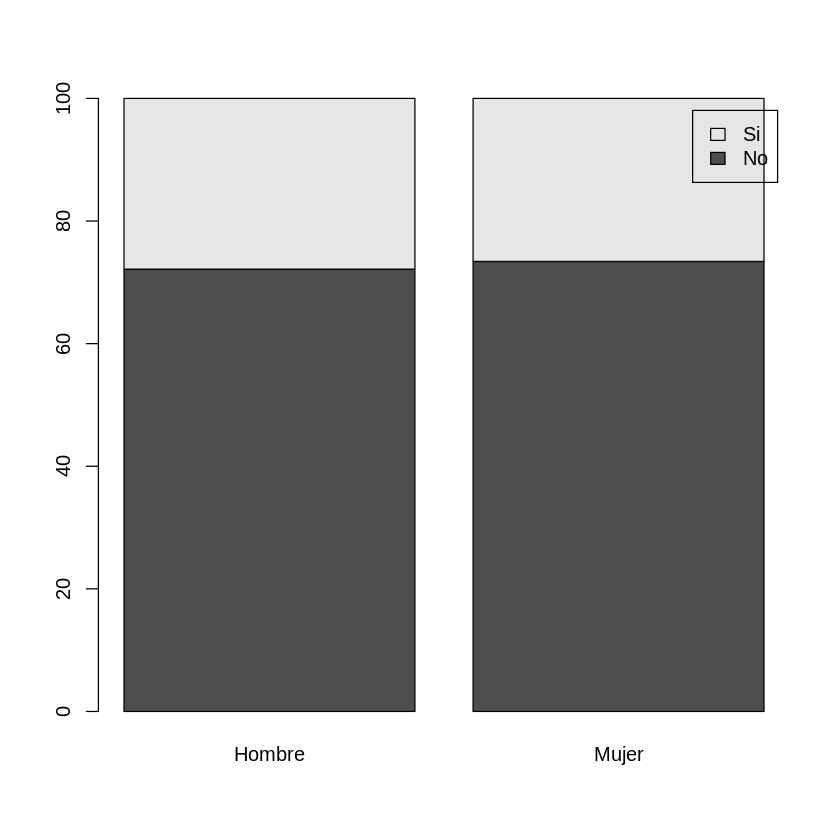

In [ ]:
# Calcula los porcentajes
tabla2<- prop.table(tabla1, margin = 2) * 100
tabla2

# Crea el gráfico de barras
bp<-barplot(tabla2, legend.text = rownames(tabla2))



Las barras son similares por ende el comportamiento es independiente



---



Veamos otro ejemplo:

**¿Hay relación entre el uso del internet (al menos una vez a la semana) y rango de edad?**

En este caso se tiene dos variables cualitativas; pero una es del tipo nominal y otra en escala ordinal, así se debe aplicar la chi cuadrada, teniendo la siguiente prueba de hipótesis:

* H0: El uso de internet y la edad son independientes

* H1: El uso de internet y la edad NO son independientes

Por lo tanto se procede a  construir la tabla de contingencia:

In [ ]:
table(dataperu$Edad)


 De 18 a 24  De 25 a 35  De 36 a 45  De 46 a 55 De 56 a más 
        152         194         202         188         264 

In [ ]:
#Formando la tabla de contingencia
tabla2=table(dataperu$InternetSemanal,dataperu$Edad)
tabla2

    
     De 18 a 24 De 25 a 35 De 36 a 45 De 46 a 55 De 56 a más
  No         85        121        146        147         229
  Si         67         73         56         41          35

Aplicamos la prueba de chi cuadrado:

In [ ]:
#Obteniendo el estadístico chi cuadrado
chisq.test(tabla2)


	Pearson's Chi-squared test

data:  tabla2
X-squared = 61.229, df = 4, p-value = 1.6e-12


En este caso si el p valor es cercano a ceo, y por debajo del nivel de significancia, con lo que se rechaza Ho y se puede decir que se podría pensar cierta relación entre uso de internet y la edad. ¿Qué tan fuerte es la relación? En este caso lo más recomendable coeficiente de contingencia

In [ ]:
#Para instala el paquete para Coeficiente de contingencia
install.packages("DescTools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘mvtnorm’, ‘expm’, ‘Exact’, ‘gld’




In [ ]:
library(DescTools)
ContCoef(tabla2)


Attaching package: ‘DescTools’


The following objects are masked from ‘package:psych’:

    AUC, ICC, SD




[1] 0.2402009

Por lo tanto se ve una relacion media entre ambas variables, veamos usando tablas:

In [ ]:
#Si se desea porcentaje en columnas se pone margin=2, si es porcentaje en fila es margin=1
tabla2p<-prop.table(tabla2, margin = 2)
tabla2p

    
     De 18 a 24 De 25 a 35 De 36 a 45 De 46 a 55 De 56 a más
  No  0.5592105  0.6237113  0.7227723  0.7819149   0.8674242
  Si  0.4407895  0.3762887  0.2772277  0.2180851   0.1325758

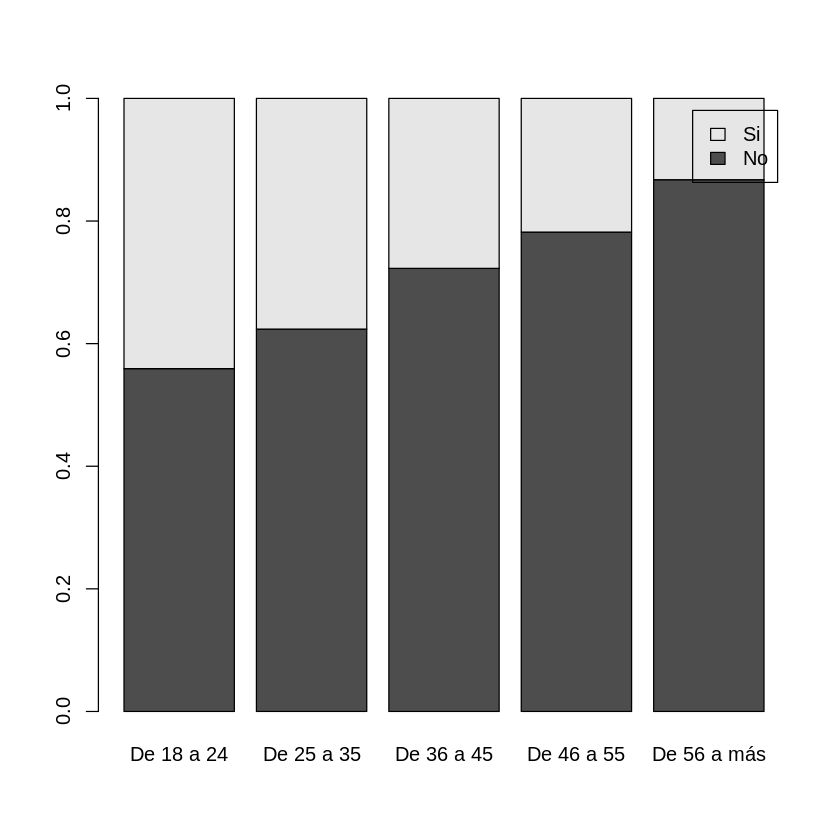

In [ ]:
#Barras apiladas
barplot(tabla2p,legend.text = rownames(tabla2p))

la distribucion de uso de internet es mayor entre el rango de edad de 18 a 24, el menor de uso se da en el rago de 56 años a mas.

**¿Y cómo se podría aplicar PRUEBA EXACTA DE FISHER?**

Se usa: fisher.test(tabla de contingencia)

In [ ]:
# Ingresemos una tabla de contingencia
tabla_contingencia <- matrix(c(10, 5, 6, 3), nrow = 2)
tabla_contingencia

[,1] [,2]
[1,] 10   6   
[2,]  5   3

In [ ]:
#Probemos primero hacerlo cob chi cuadrado
chisq.test(tabla_contingencia)

Warning message in chisq.test(tabla_contingencia):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tabla_contingencia
X-squared = 0, df = 1, p-value = 1


In [ ]:
#Validemos las frecuencias esperadas:
result<-chisq.test(tabla_contingencia)
result$expected

Warning message in chisq.test(tabla_contingencia):
“Chi-squared approximation may be incorrect”


[,1] [,2]
[1,] 10   6   
[2,]  5   3

In [ ]:
#Ahora le aplicamos la prueva
resultados<-fisher.test(tabla_contingencia)
resultados$p.value

[1] 1

**Correlaciones**:
**********************************************************************

Para ver como se puede trabajar correlaciones se tomará los datos de 470 jefes del hogar a quienes se les ha preguntado:

| Variable | Significado |
| --- | --- |
| nivel | nivel educativo (mayor número mayor nivel educativo |
| Gasto | Gasto del hogar |
| Ingreso | Ingreso del hogar |
| Genero | (Hombre/Mujer) |
| GastoR | Gasto recodificado (mayor número mayor ingreso) |

Con estos datos ver la correlación de las variables.La base se llama Hogares.csv

In [ ]:
#Cargamos la base
hogares<-read.csv("Hogares.csv",header = TRUE)
head(hogares,n=5L)

nivel Gasto   Ingreso Genero IngresoR
1 4     1829.93 2589.33 Hombre 3       
2 5     4524.72 6022.25 Hombre 4       
3 6      913.85  711.33 Hombre 1       
4 6     4406.78 5194.92 Hombre 4       
5 6     1818.74 2201.83 Hombre 3

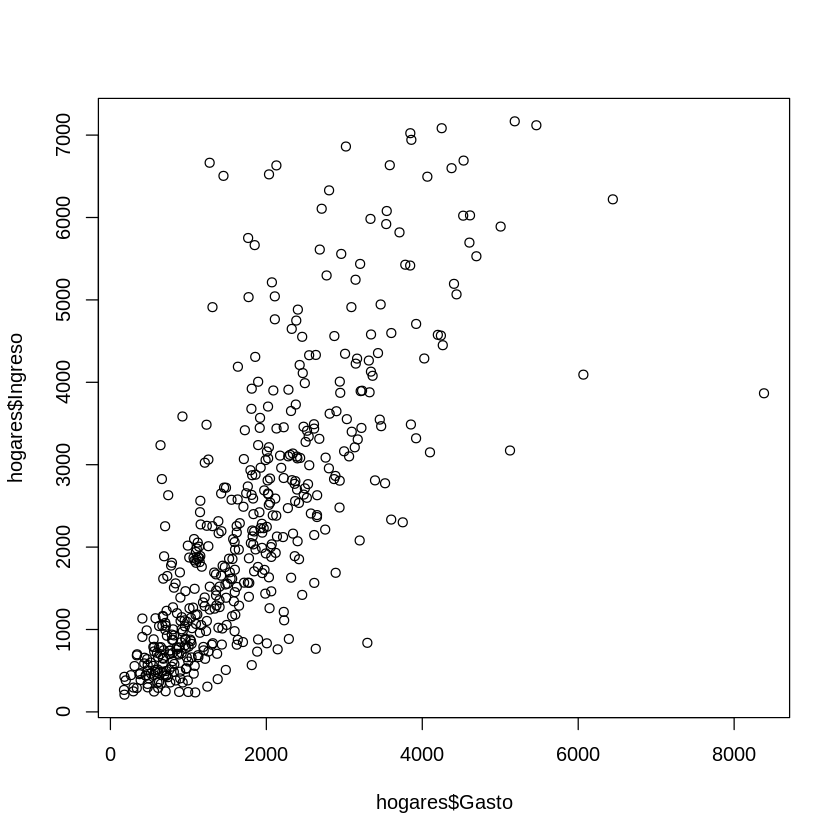

In [ ]:
#Se puede analizar la correlación de gasto con ingreso/ solo para variables cuantitativas
plot(hogares$Gasto,hogares$Ingreso)

al parecer hay relacion entre las variables de ingreso y gasto, para optener la relacion se usara pearson

In [ ]:
#ambas variables son cuantitativas, por ende se aplica el metodo de pearson
cor(hogares$Gasto,hogares$Ingreso, method = "pearson")

[1] 0.76596

la realacion es fuerte, ambos aumentan o ambos disminuyen

In [ ]:
cor(hogares$Gasto,hogares$Ingreso, method = "spearman")

[1] 0.8163677

¿Hay alguna relación entre el nivel educativo y el ingreso?

In [ ]:
#relacion entre una cualitativa ordinal con una cuantitativa-> usar spearman
cor(hogares$nivel, hogares$IngresoR, method = "spearman")

[1] 0.4212946

Hay una relacion moderada, entre el nivel educativo y el ingreso, a nivel mayor educativo mayor ingreso o menor nivel educativo menor ingreso

¿Hay relación entre el genero y el rango de ingreso?

In [ ]:
library(DescTools)
ContCoef(hogares$Genero,hogares$IngresoR)

[1] 0.2766268

**APLICACIÓN 1**:

********************************************************

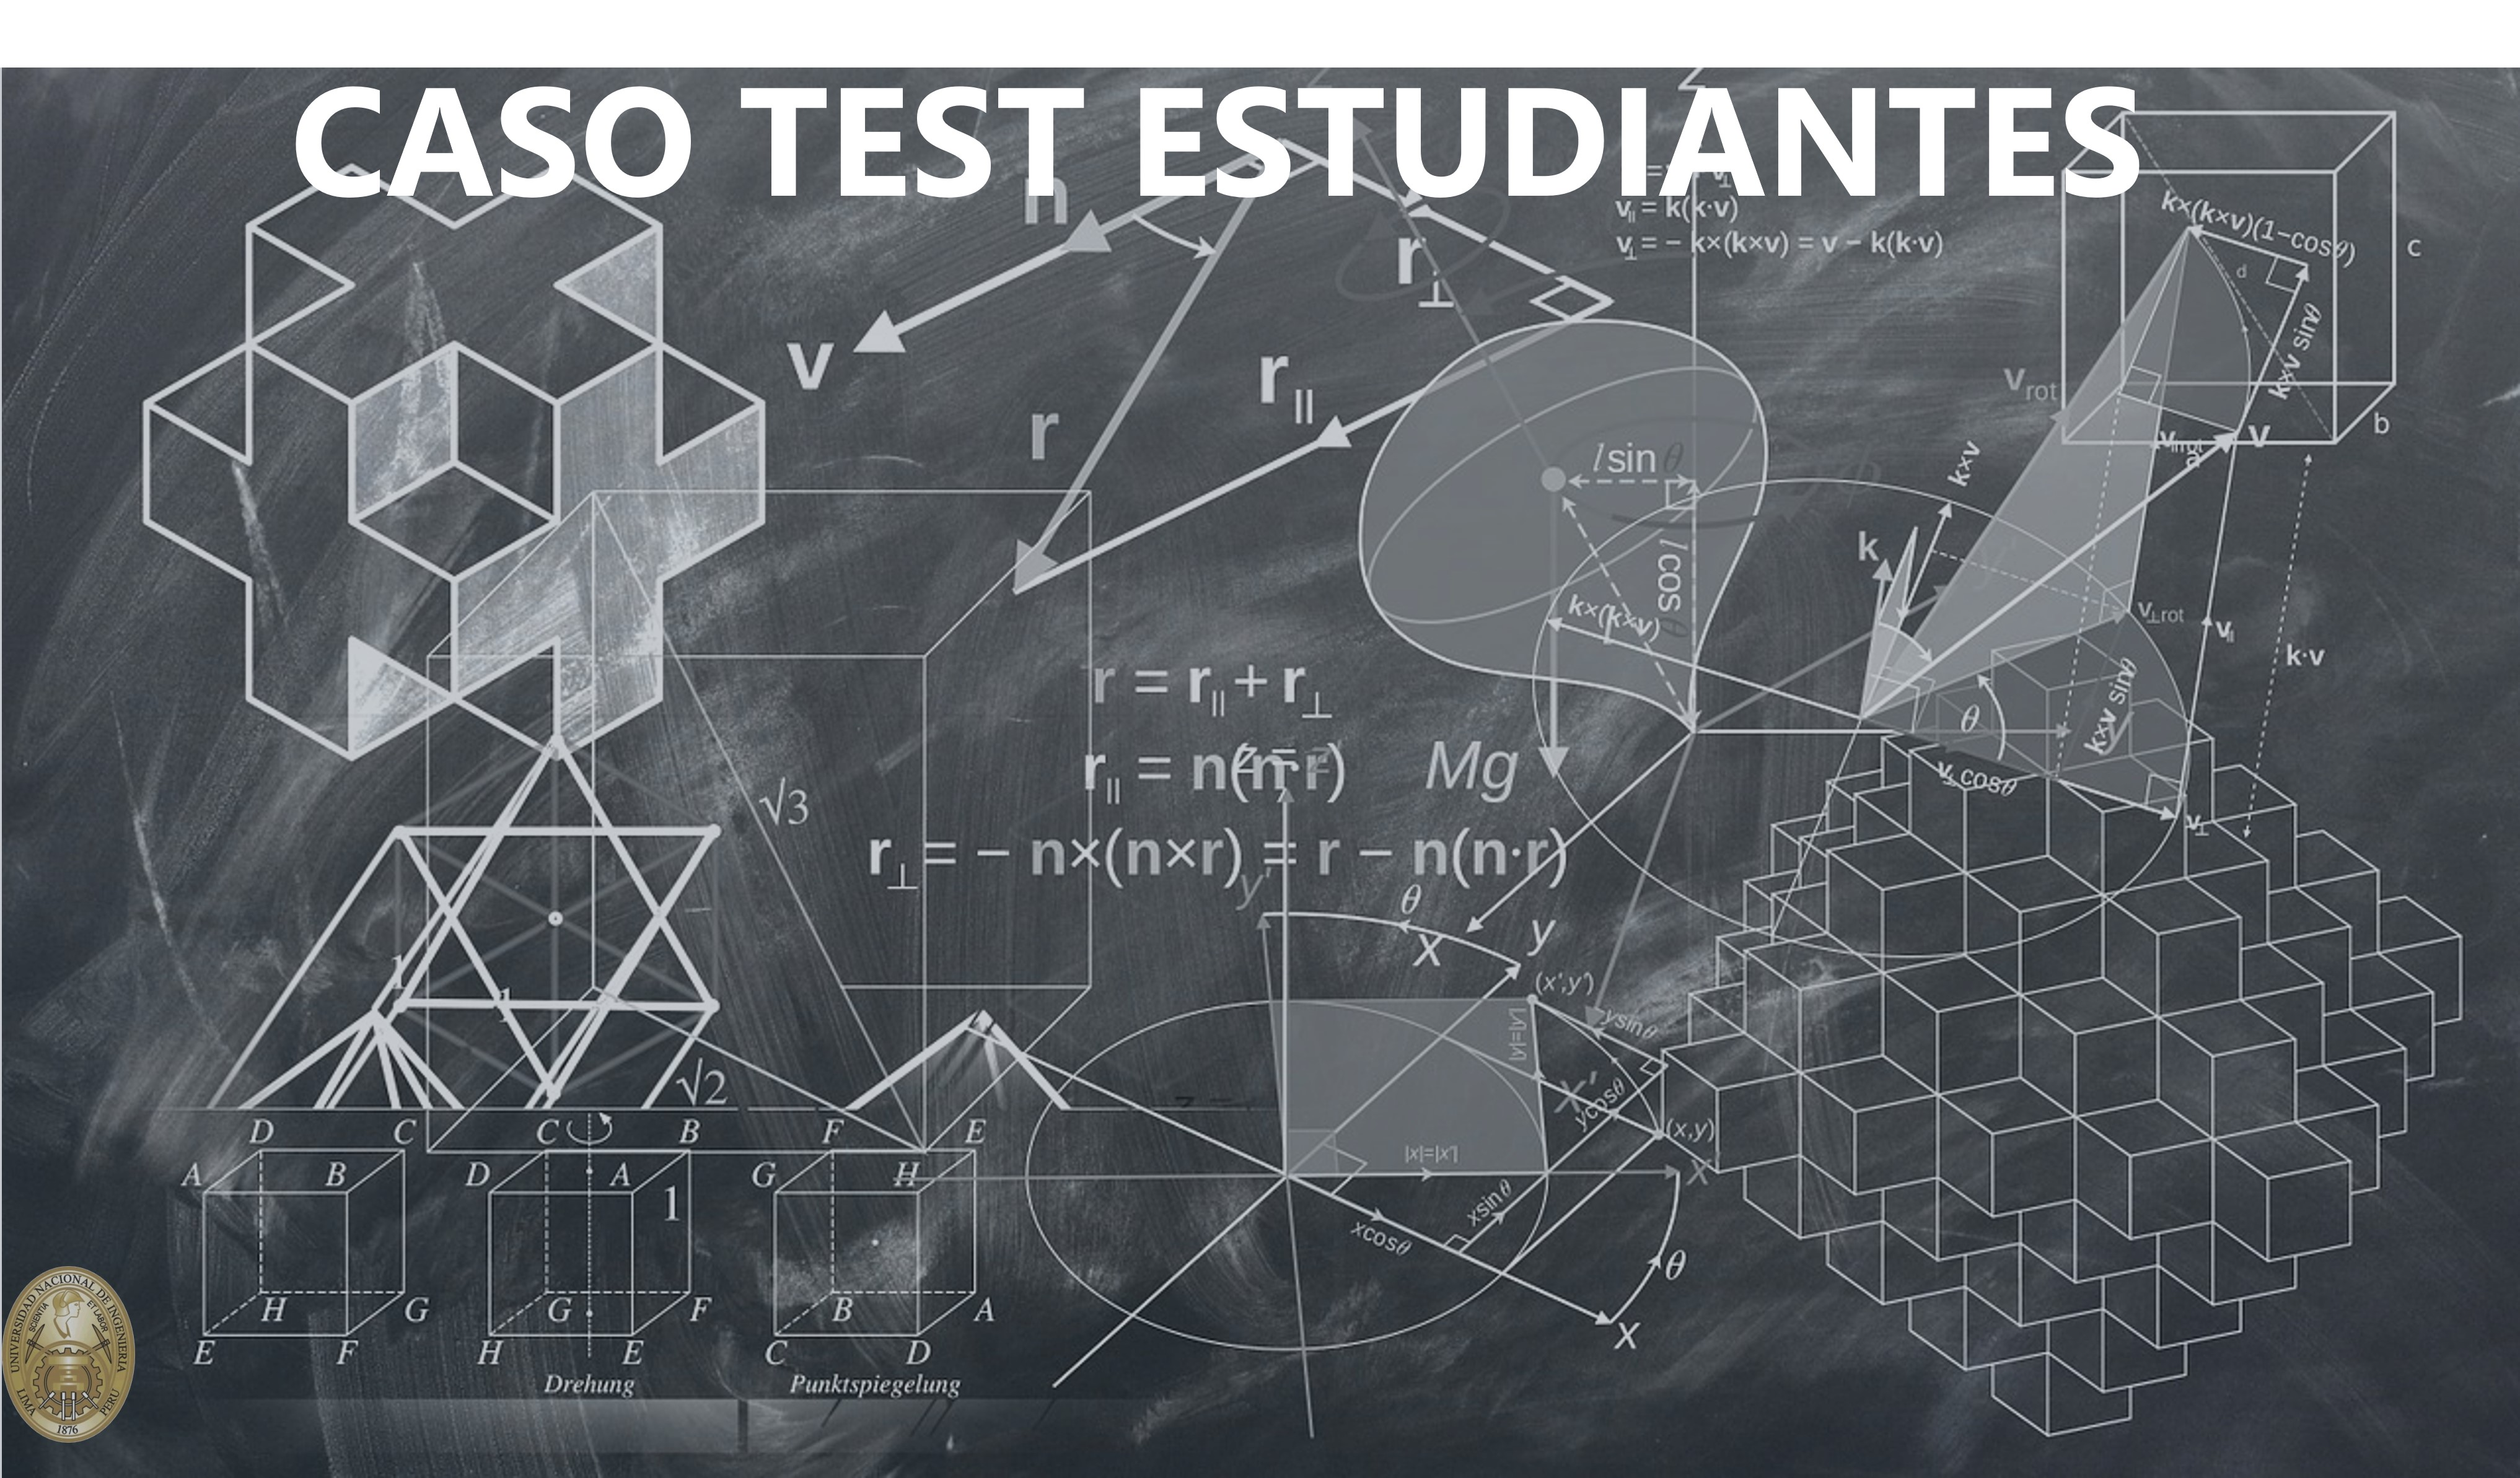

Los datos muestran los rendimiento de los estudiantes en la educación secundaria de dos escuelas portuguesas. La base de datos cuenta con:

| Variable | Significado |
| --- | --- |
| colegio | Colegio de procedencia (GP: Gabriel Pereira, MS: Mousinho de Silveira) |
| famsize | LE3 (Menos o igual a 3 personas), GT3 (Más o igial a 3 personas) |
| Pestatus | A (Juntos) , T (Separados) |
| higuer | ¿Desea seguir estudios superiores (Yes,No) |
| G1 | Nota del parcial1 |
| G2 | Nota del parcial2 |
| G3 | Nota final |
| G3R| Notal final aprobada (1: De 0 a 10, 2: De 10 a 15, 3: De 16 a 20) |


La idea es analizar la relación de las variables con la nota final del curso (G3). Respondiendo las siguientes preguntas:

1. ¿Las notas de los exámenes parciales (G1) y (G2) están relacionados con la nota final del curso?
2. ¿Se podría decir que las notas de los estudiantes está relacionado con el colegio de procedencia?
3. ¿El tamaño de la familia está relacionado con el rendimiento del estudiante?
4. ¿El hecho de que los padres vivan juntos esta relacionado con las notas de los estudiantes?
5. ¿La decisión de seguir estudios superiores está relacionado con sus notas de la escuela?


In [ ]:
#Cargamos la base
dataTest<-read.csv("Caso_TestEstudiantes.csv",header = TRUE)
head(dataTest)

colegio famsize Pstatus higher G1 G2 G3 G3R
1 GP      GT3     A       yes     0 11 11 2  
2 GP      GT3     T       yes     9 11 11 2  
3 GP      LE3     T       yes    12 13 12 2  
4 GP      GT3     T       yes    14 14 14 2  
5 GP      GT3     T       yes    11 13 13 2  
6 GP      LE3     T       yes    12 12 13 2

In [ ]:
#revisando las dimenciones de la base de datos
dim(dataTest)

[1] 649   8

**1. ¿Las notas de los exámenes parciales (G1) y (G2) están relacionados con la nota final del curso?**

Ambas variables son de tipo cuantitativas, ver si hay atípicos

*   ver los descriptivos
*   ver el diagrama de cajas
*   ver el histograma





In [ ]:
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Analizando primero el primer parcial que es G1**

In [ ]:
#sacando descriptivos G1
library(psych)
describe(dataTest$G1)


vars n   mean     sd       median trimmed  mad    min max range skew        
X1 1    649 11.39908 2.745265 11     11.38004 2.9652 0   19  19    -0.002760829
   kurtosis  se       
X1 0.0178044 0.1077611

el valor de Sken que representa la simetria es casi cero

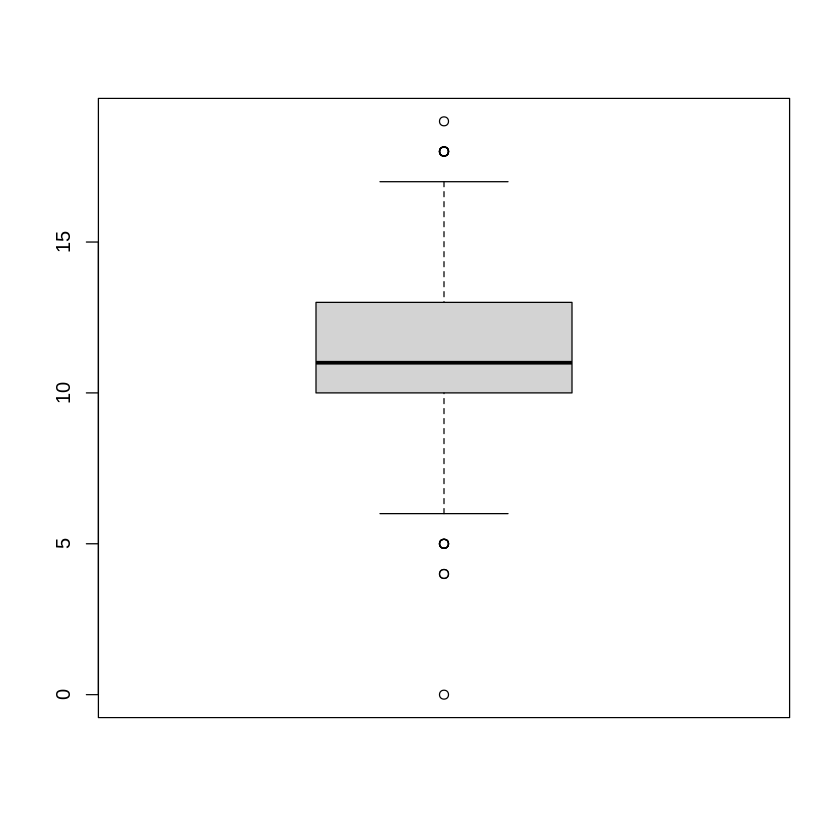

In [ ]:
boxplot(dataTest$G1)

Los valores atipicos no afectan mucho a la medida de tendencia central

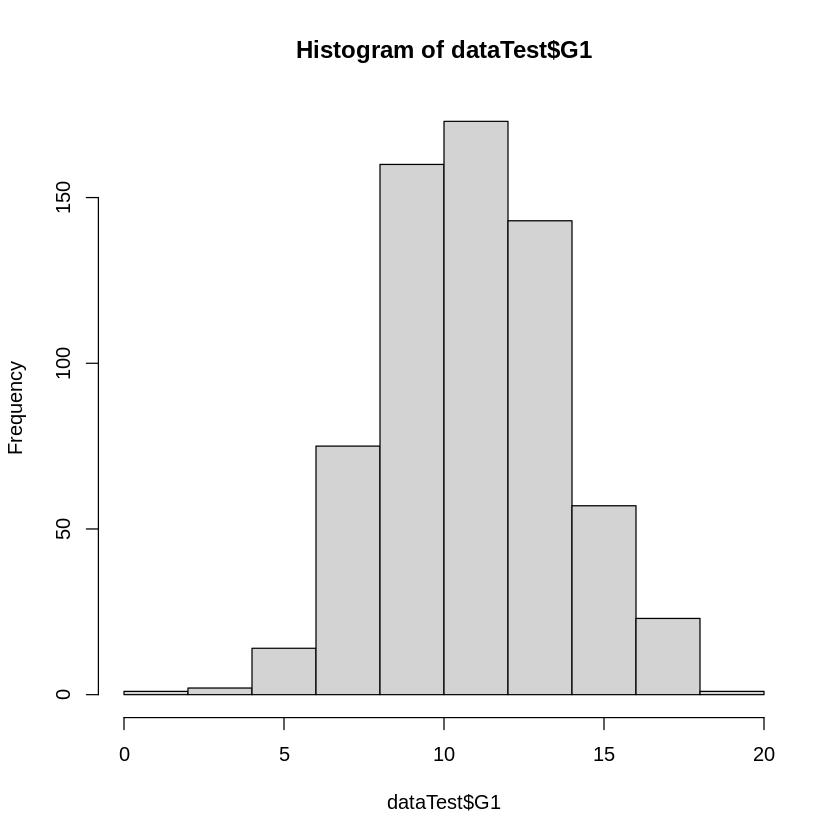

In [ ]:
hist(dataTest$G1)

Los valores estan centrados, por lo tanto los valores atipicos no afectan mucho

**Analizando el segundo parcial que es G2**

In [ ]:
#descritivo para G2
describe(dataTest$G2)

vars n   mean     sd       median trimmed  mad    min max range skew     
X1 1    649 11.57011 2.913639 11     11.55662 2.9652 0   19  19    -0.358619
   kurtosis se       
X1 1.626164 0.1143703

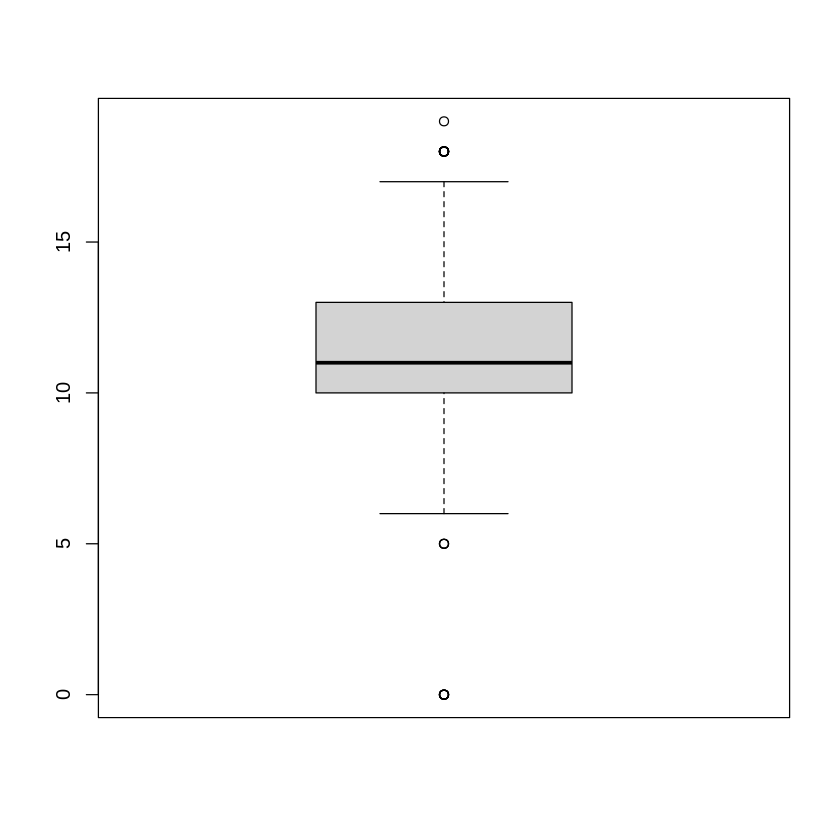

In [ ]:
#diagrama de cajas
boxplot(dataTest$G2)

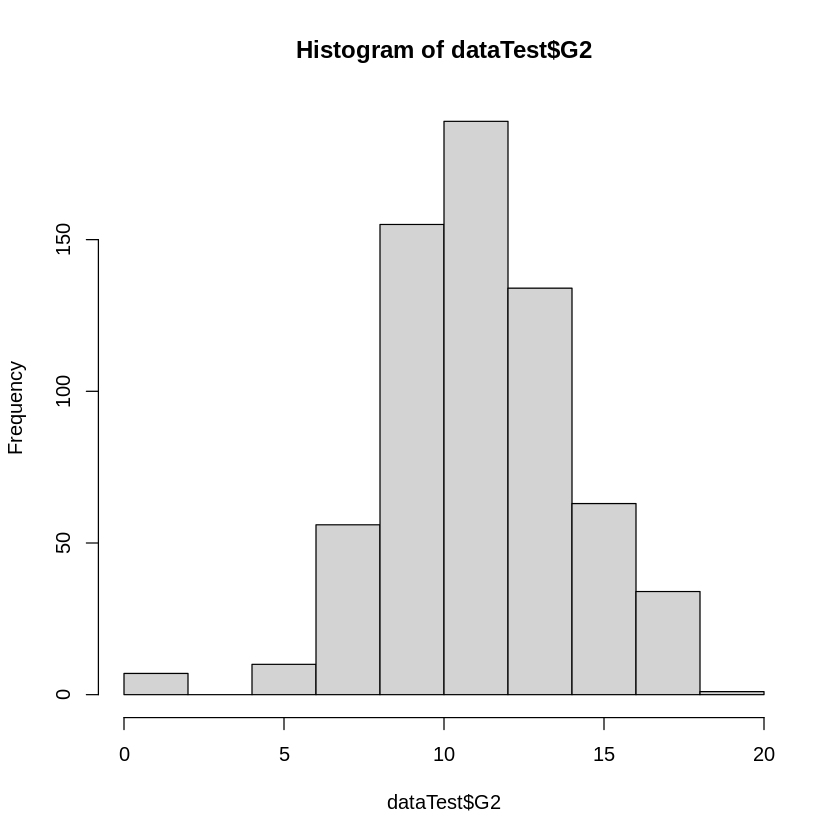

In [ ]:
#histograma para G2
hist(dataTest$G2)

Analizando la simetria de los datos, los valores atipicos no afectan la medida central

**Analizando la variable de nota final**

In [ ]:
describe(dataTest$G3)

vars n   mean     sd       median trimmed  mad    min max range skew      
X1 1    649 11.90601 3.230656 12     12.03839 2.9652 0   19  19    -0.9086938
   kurtosis se       
X1 2.664626 0.1268144

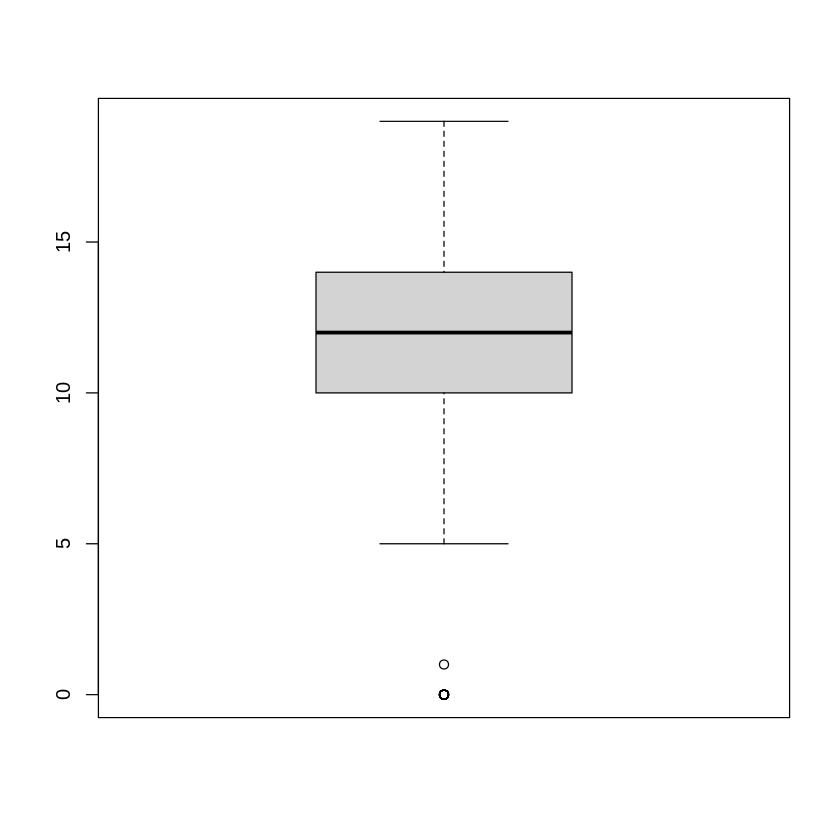

In [ ]:
boxplot(dataTest$G3)

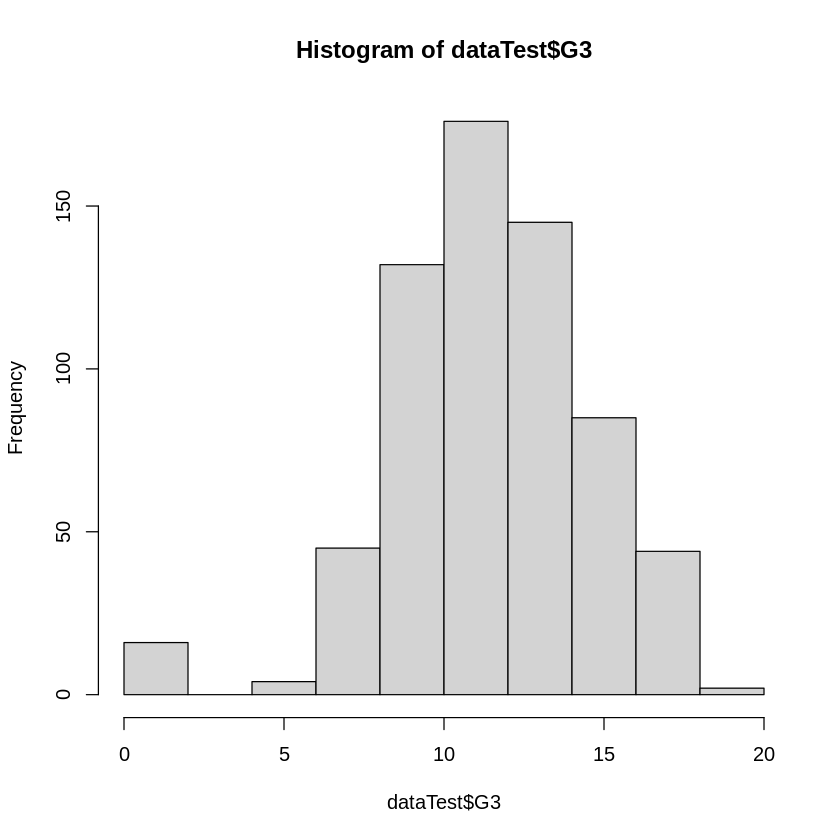

In [ ]:
hist(dataTest$G3)

Dado que no hay valores atipicos que afecten fuertemente a la media, se pasa a calculo de correlaciones

Primero veamos graficamente:

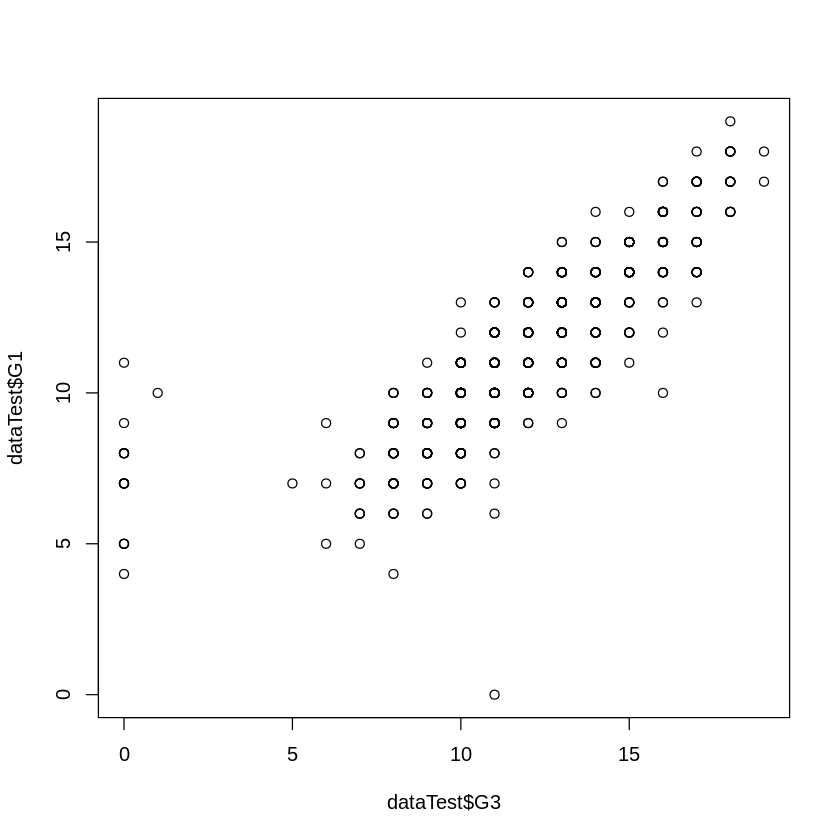

In [ ]:
plot(dataTest$G3,dataTest$G1)

La mayoria de los datos se acoplan a una recta, aparece una correlacion

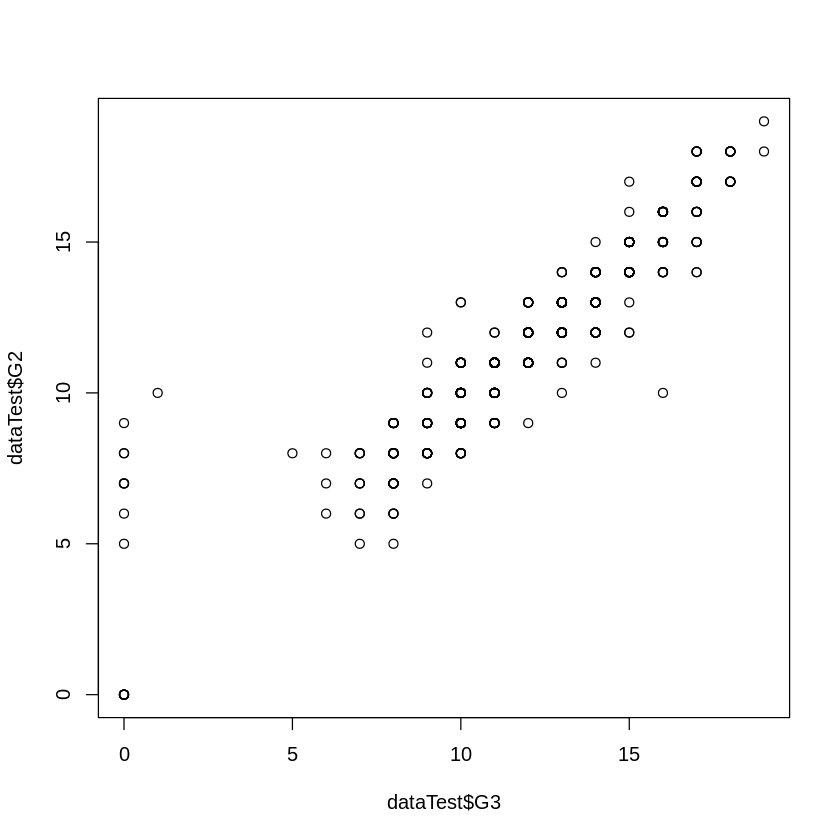

In [ ]:
plot(dataTest$G3,dataTest$G2)

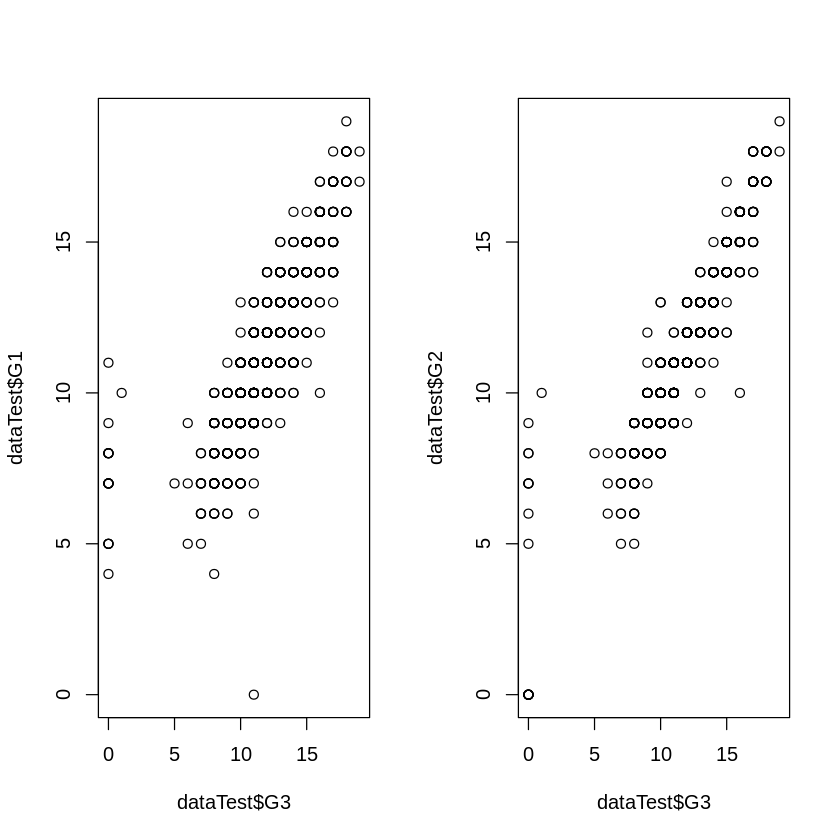

In [ ]:
#dos graficos juntos
par(mfrow = c(1,2)) # una fila y dos columnas
plot(dataTest$G3,dataTest$G1)
plot(dataTest$G3,dataTest$G2)

In [ ]:
#validando numericamente la correlacion
cor(dataTest$G1,dataTest$G3)

[1] 0.8263871

In [ ]:
cor(dataTest$G2,dataTest$G3)

[1] 0.918548

Las notas de las parciales estan fuertemente relacionadas con la nota final. Se podria mejorar el análisis retirando los ceros.

**2. ¿Se podría decir que las notas de los estudiantes está relacionado con el colegio de procedencia?**

Tenemos por una parte la nota de los alumnos que es cuantitativa y el colegio de procedencia que es de tipo nonimal, para poder hallar ello se debe convertir la cualitativa a una ordinal (G3R)

Se aplica la chi cuadrado:

H0: La nota del alumno es independiente del colegio de procedencia

In [ ]:
#se obtiene primero la tabla de contingencia
#tabla1<-table(dataTest$colegio,dataTest$G3R)
tabla1<-table(dataTest$G3R,dataTest$colegio)
tabla1

   
     GP  MS
  1  85 112
  2 279  91
  3  59  23

In [ ]:
#Aplicando la prueba de chicuadrado
chisq.test(tabla1)


	Pearson's Chi-squared test

data:  tabla1
X-squared = 60.837, df = 2, p-value = 6.158e-14


Viendo graficamente la relación

In [ ]:
tabla1p<-prop.table(tabla1,margin=2)
tabla1p

   
           GP        MS
  1 0.2009456 0.4955752
  2 0.6595745 0.4026549
  3 0.1394799 0.1017699

Warning message in plot.window(xlim, ylim, log = log, ...):
“"text" is not a graphical parameter”
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“"text" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"text" is not a graphical parameter”
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“"text" is not a graphical parameter”


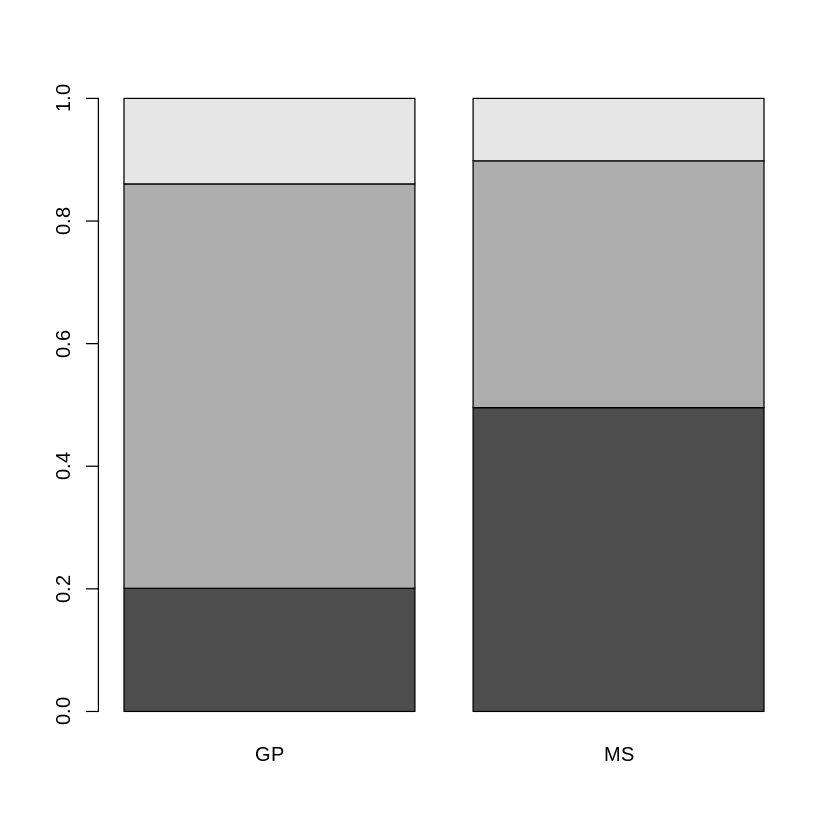

In [ ]:
barplot(tabla1p,text=rownames(tabla1p))

**3. ¿El tamaño de la familia está relacionado con el rendimiento del estudiante?**


In [ ]:
#construir la tabla de contingencia
tabla1<-table(dataTest$G3R,dataTest$famsize)
tabla1

   
    GT3 LE3
  1 140  57
  2 261 109
  3  56  26

In [ ]:
#Aplicando el chi cuadrado
chisq.test(tabla1)


	Pearson's Chi-squared test

data:  tabla1
X-squared = 0.22017, df = 2, p-value = 0.8958


la nota del alumno es independiente del tamaño de la familia

In [ ]:
#tabla de proporciones
tabla1p<-prop.table(tabla1, margin = 2)
tabla1p

   
          GT3       LE3
  1 0.3063457 0.2968750
  2 0.5711160 0.5677083
  3 0.1225383 0.1354167

Warning message in plot.window(xlim, ylim, log = log, ...):
“"text" is not a graphical parameter”
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“"text" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"text" is not a graphical parameter”
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“"text" is not a graphical parameter”


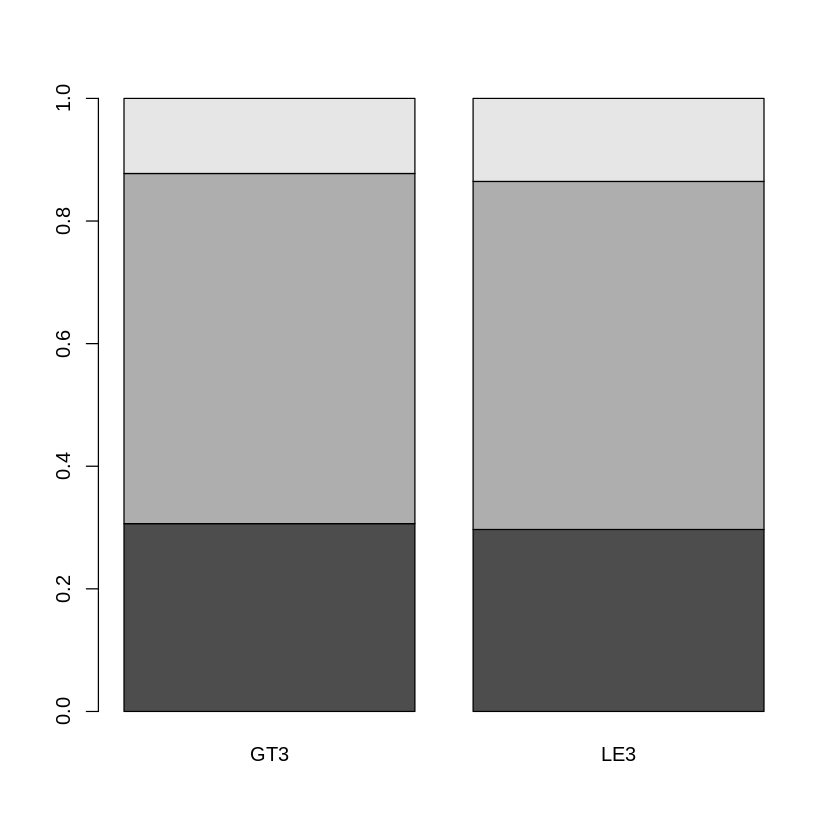

In [ ]:
barplot(tabla1p,text=rownames(tabla1p))

**4. ¿El hecho de que los padres vivan juntos esta relacionado con las notas de los estudiantes?**


**5. ¿La decisión de seguir estudios superiores está relacionado con sus notas de la escuela?**

In [ ]:
#nominal con una ordinal
tabla1<-table(dataTest$G3R,dataTest$higher)
tabla1

   
     no yes
  1  52 145
  2  17 353
  3   0  82

In [ ]:
#prueba de chi cuadrado
chisq.test(tabla1)


	Pearson's Chi-squared test

data:  tabla1
X-squared = 75.474, df = 2, p-value < 2.2e-16


In [ ]:
#tabla de proporciones
tabla1p<-prop.table(tabla1, margin = 2)
tabla1p

   
           no       yes
  1 0.7536232 0.2500000
  2 0.2463768 0.6086207
  3 0.0000000 0.1413793

Warning message in plot.window(xlim, ylim, log = log, ...):
“"text" is not a graphical parameter”
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“"text" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"text" is not a graphical parameter”
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“"text" is not a graphical parameter”


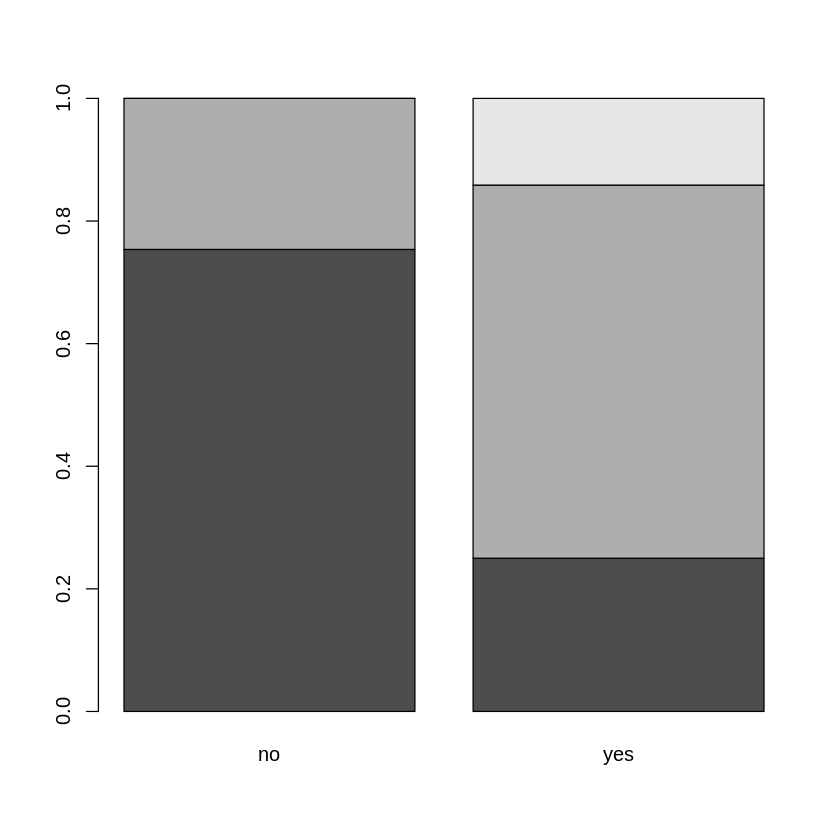

In [ ]:
barplot(tabla1p,text=rownames(tabla1p))

**APLICACIÓN 2**:

********************************************************

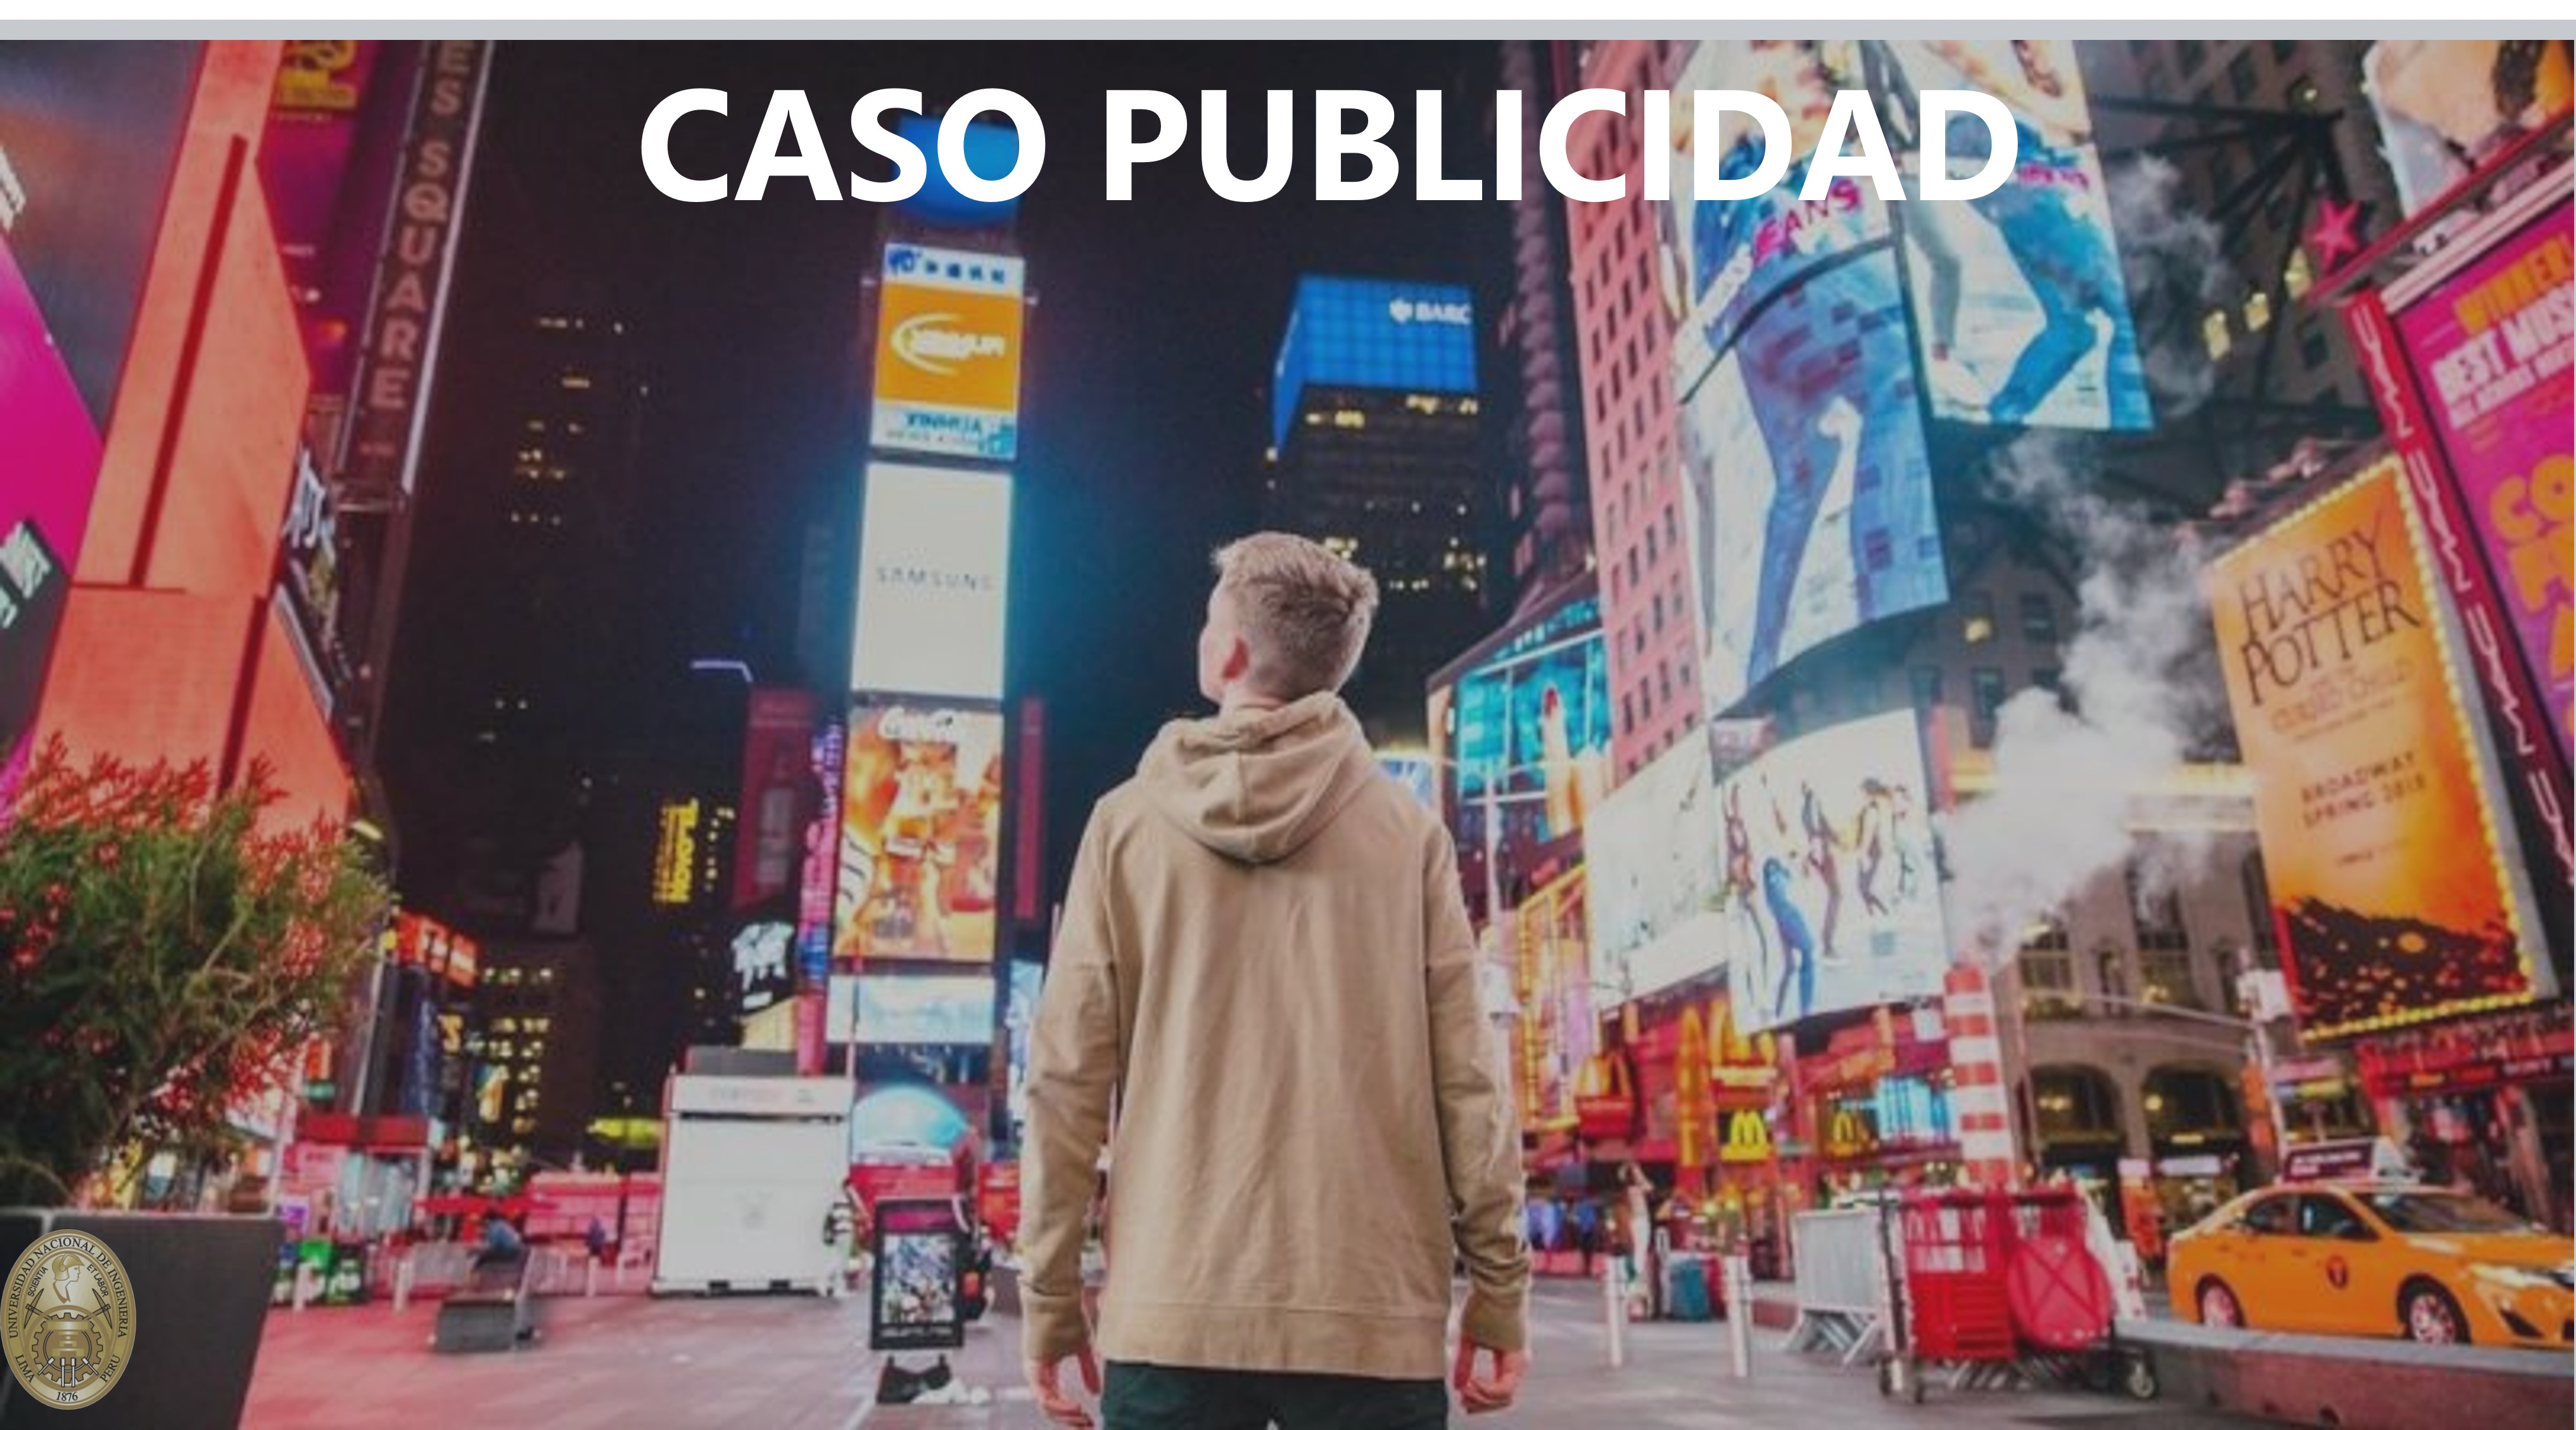

Se ha recolectado datos de las ventas mensuales de un producto, así como también la inversión hecha en TV, radio y web. Con esta data se desea saber qué inversión está mas relacionado está con las ventas, con ello seleccionar las variables adecuadas para trabajar un análisis de regresión lineal múltiple que permita ver cómo impacta en las ventas cada una de las inversiones realizadas.

La data tiene las siguientes variables:

| Variable | Significado |
| --- | --- |
| Ventas | Ventas |
| Inv_Tv | Inversión en TV |
| Inv_Radio | Inversión en Radio |
| Inv_web | Inversión en web |


Comenzamos a cargar la base de datos:

In [ ]:
#Cargamos la base
dataPublicidad<-read.csv("Caso_Publicidad.csv",header = TRUE)
head(dataPublicidad)

Ventas   Inv_Tv   Inv_Radio Inv_web
1 64171.54 11526.31 3960.82   459.88 
2 61935.86 10098.37 3652.94   392.17 
3 62460.57 11159.18 3809.98   568.52 
4 59852.44  9606.41 3440.66   523.01 
5 59983.16 11629.63 2936.62   480.54 
6 57402.71  7940.36 1714.74   556.60

In [ ]:
#correlacion entre ventas y inversion en Tv
cor(dataPublicidad$Ventas,dataPublicidad$Inv_Tv)

[1] 0.6517723

In [ ]:
#correlacion entre ventas y inversion Radio
cor(dataPublicidad$Ventas,dataPublicidad$Inv_Radio)

[1] 0.8563462

In [ ]:
#correlacion entre ventas y web
cor(dataPublicidad$Ventas,dataPublicidad$Inv_web)

[1] 0.1037044

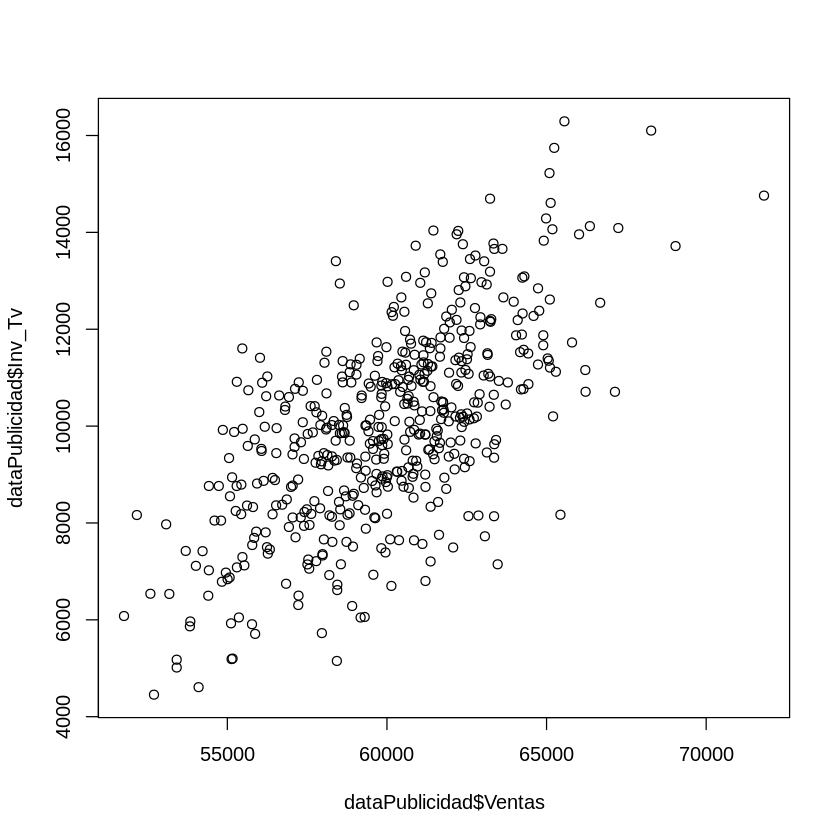

In [ ]:
#grafico de correlaciones
plot(dataPublicidad$Ventas,dataPublicidad$Inv_Tv)

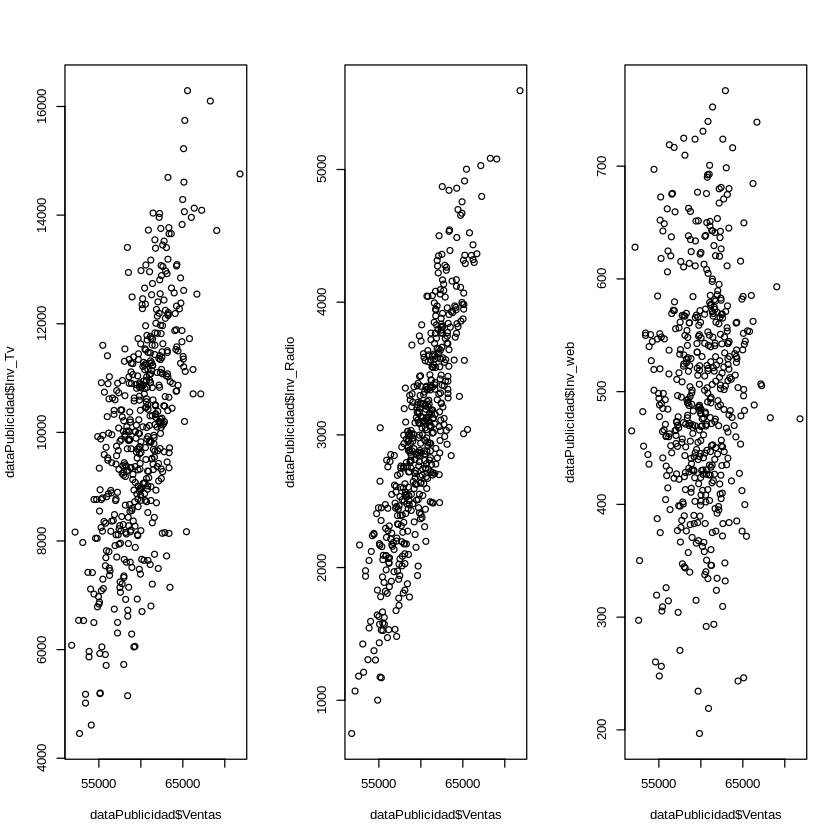

In [ ]:
par(mfrow = c(1,3)) # una fila y dos columnas
plot(dataPublicidad$Ventas,dataPublicidad$Inv_Tv)
plot(dataPublicidad$Ventas,dataPublicidad$Inv_Radio)
plot(dataPublicidad$Ventas,dataPublicidad$Inv_web)

Forma tecnica de sintetizar los graficos si se tiene mayor cantidad de datos numericos

In [ ]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



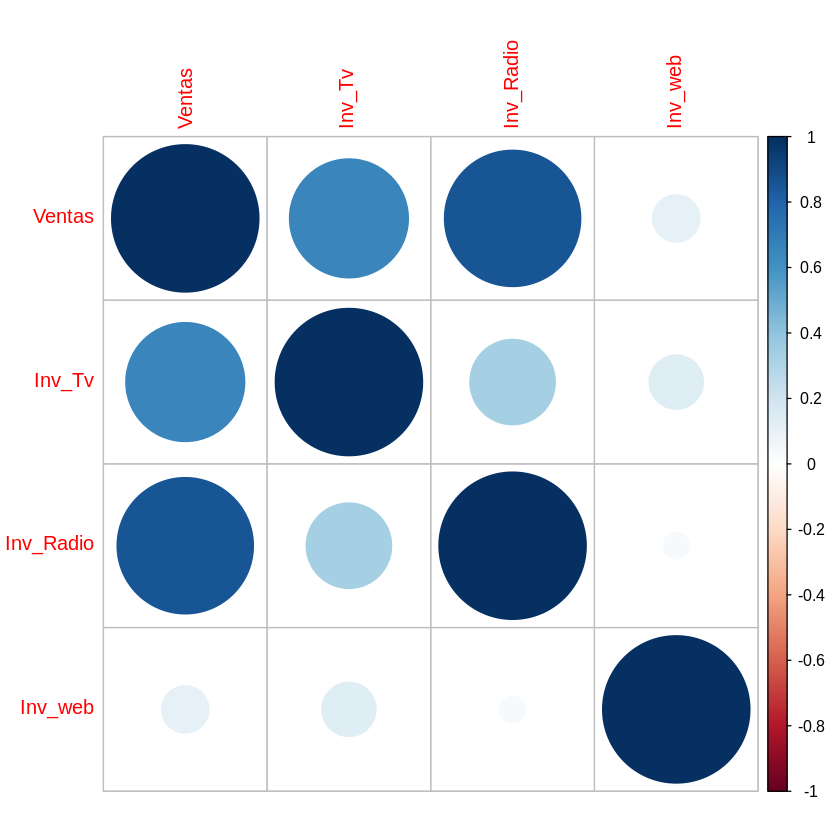

In [ ]:
library(corrplot)
corrplot(cor(dataPublicidad))

El tamaño de los circulos indica que tan fuerte es la relacion, el circulo mas grande es el de radio, el segundo es TV y el mas pequeño es web, los numeros indican intensidad los casos negativos son rojos, los positivos son azules

- a mayor tamaño mayor correlacion
- a mayor intensidad de azul mayor correlacion

si hubiera relaciones negativas, los colores son rojos

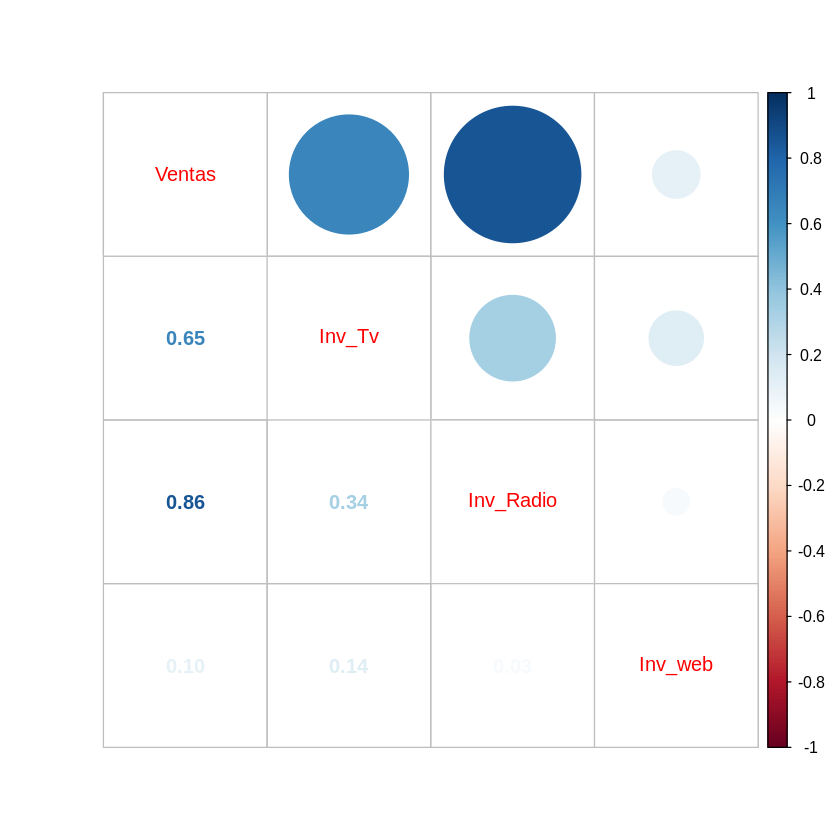

In [ ]:
library(corrplot)
corrplot.mixed(cor(dataPublicidad), lower = "number",upper = "circle")

**APLICACIÓN 3**:

********************************************************

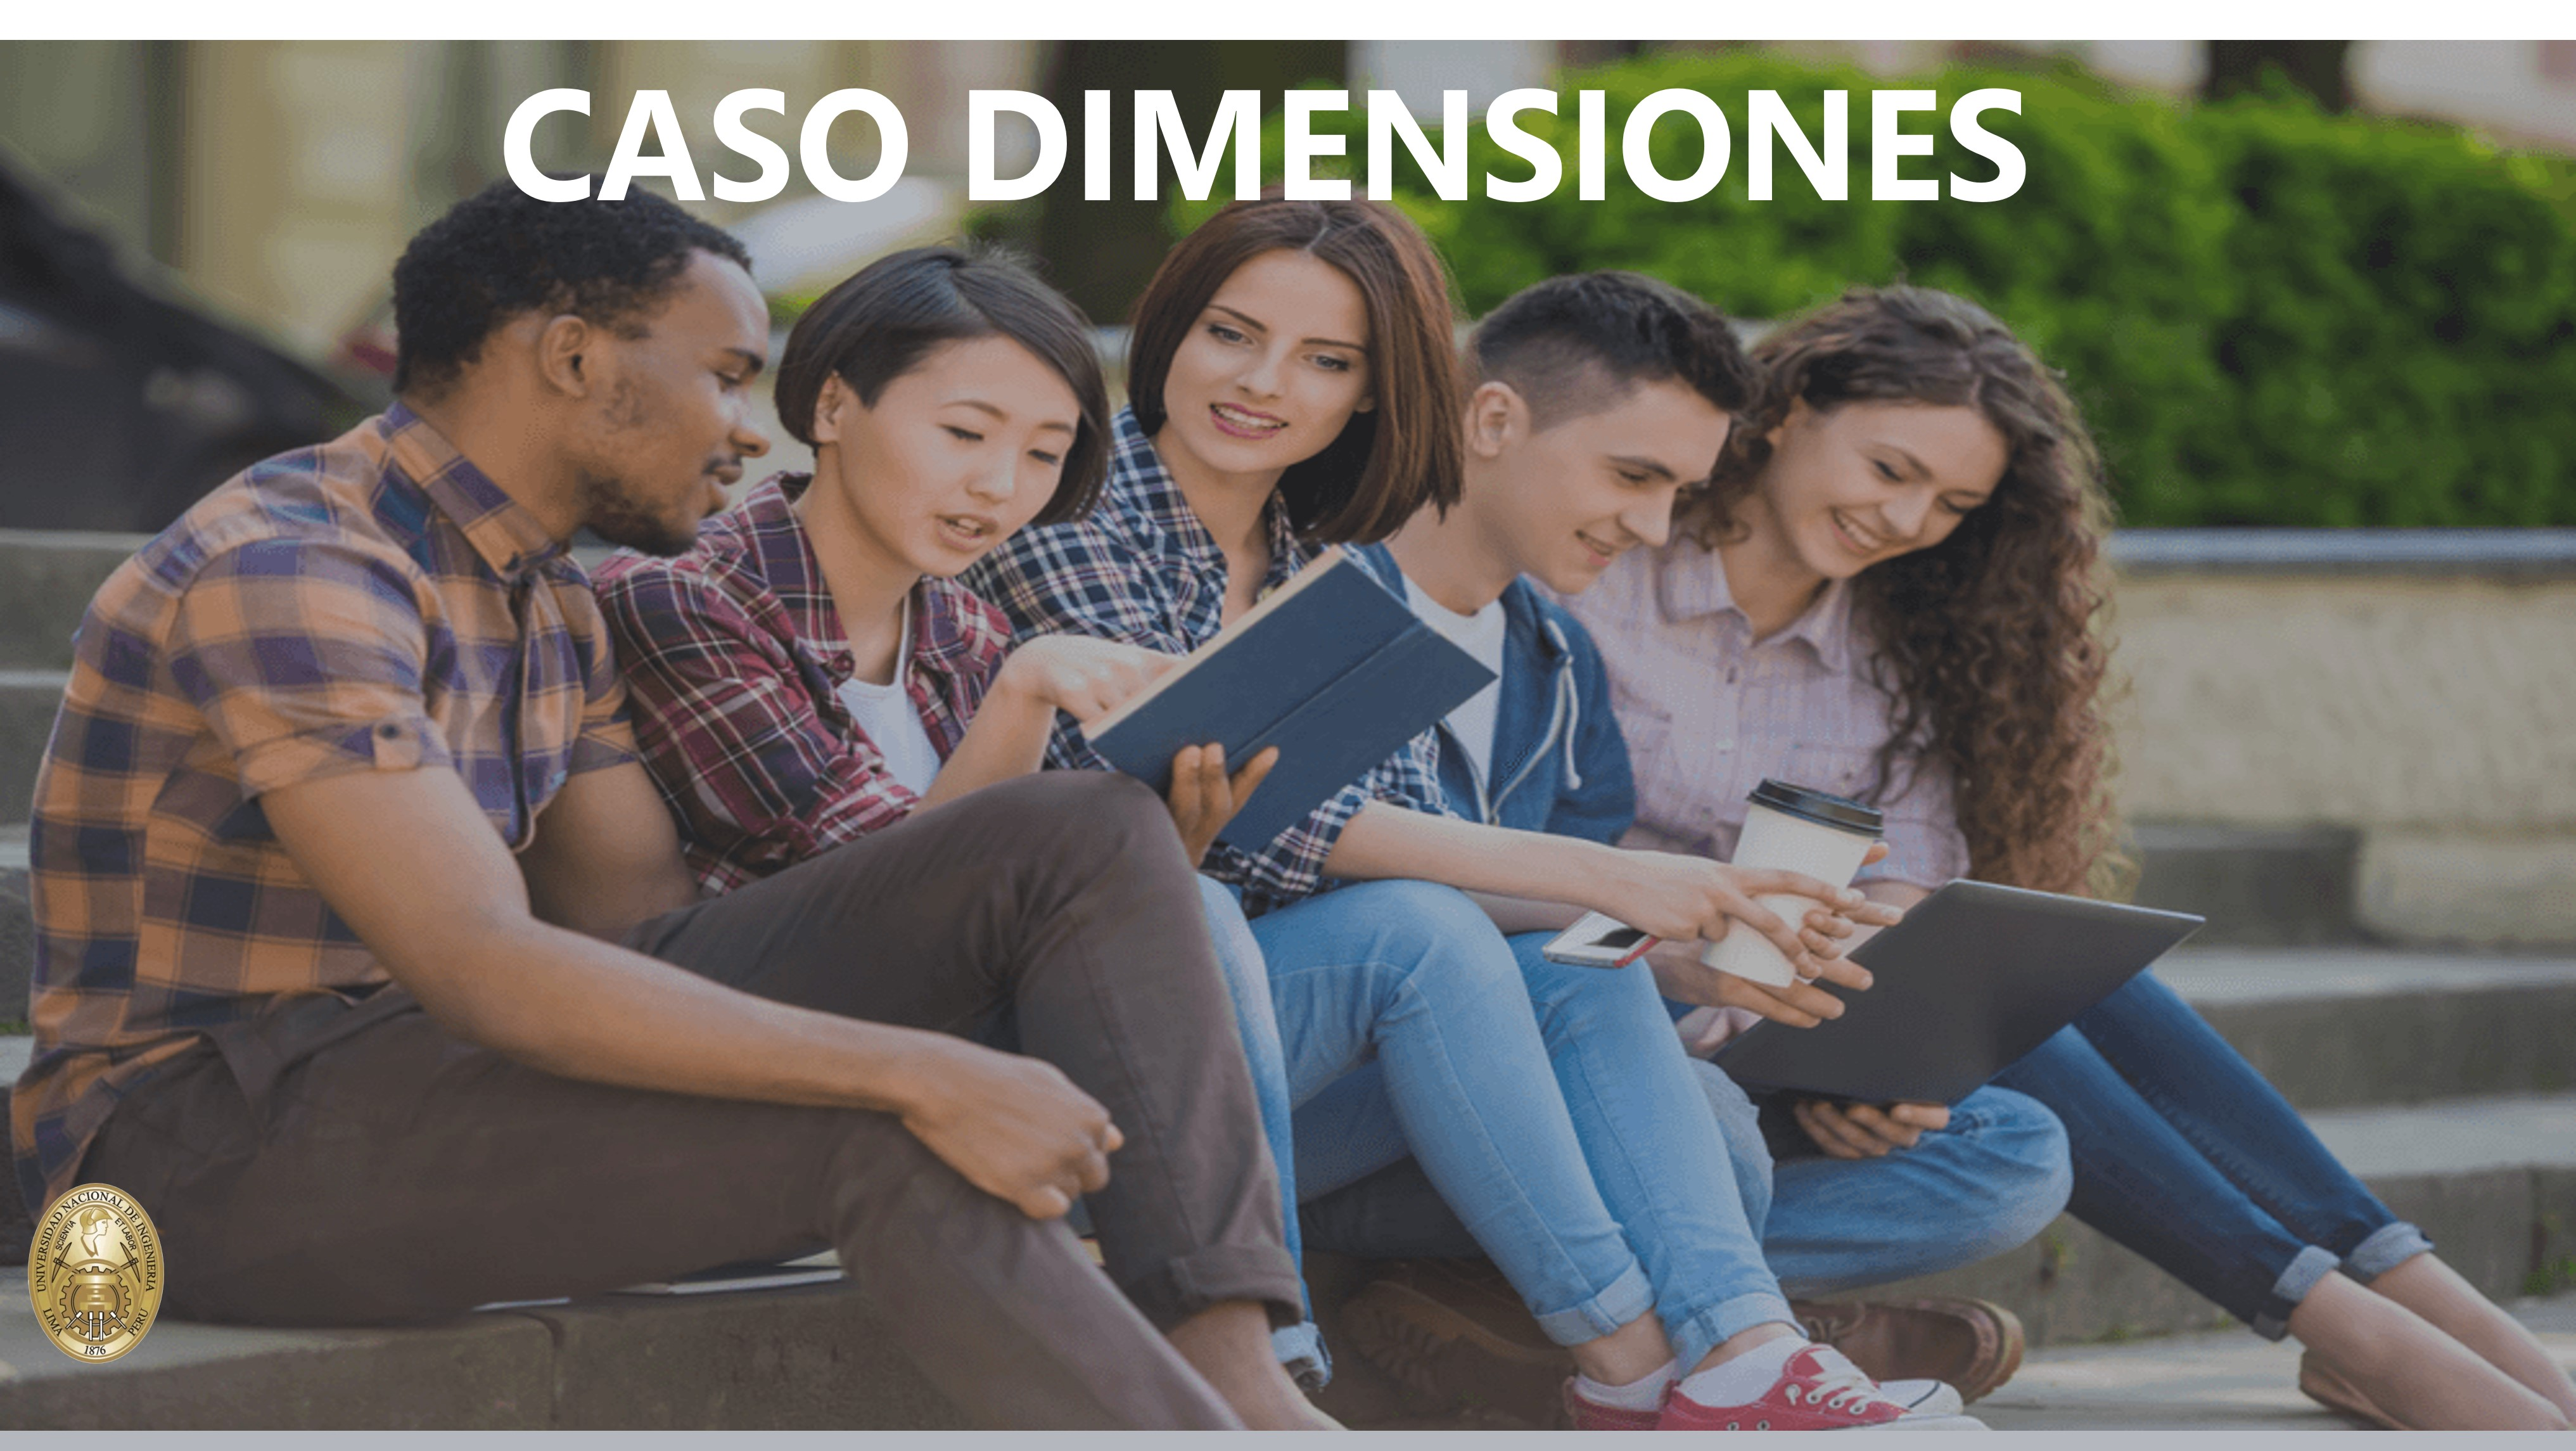

Por lo general contamos con una gran catidad de variables, lo que en algunas ocasiones puede complicar el análisis al tener variables que que dicen lo mismo. La estadística ayuda en este sentido, y brinda una seria de técnicas para poder reducir el número de variables bajo técnicas como por ejemplo el de componentes principales, cuya lógica tiene base en el análisis de correlaciones, en donde las variables originales se agrupan y forman nuevas variables que serían las nuevas dimensiones de análisis.



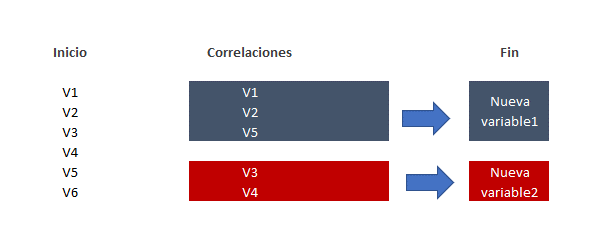

Caso: Los Milleniams están produciendo un duro cambio, los también llamados nativos de la era digital y autodidactas de la tecnología, son los jóvenes que hoy tienen entre 21 y 35 años, forma parte de una economía global en la que demuestran su capacidad de adaptarse y alcanzar nuevas soluciones para los constantes retos que se enfrentan tanto en Latinoamérica como a nivel global. En Lima Metropolitana se estima que hay 2’638,200 Millenians.

Los Millennials no compran cualquier marca. Según diversos estudios buscan y consumen marcas que tengan una personalidad y un mensaje definido. Además, tienen preferencias por marcas que ostentan valores como el cuidado del medio ambiente, los derechos humanos, el cuidado de los niños y el trabajo forzado y otros. Asimismo, buscan el valor agregado en los distintos productos que adquieren. Todo esto convierte a los Milleniams en un grupo interesante de consumidores. Un estudio ha recopilado los siguientes datos de ellos, analizarlos y ver que dimensiones (agrupación de variables) se podrían formar:


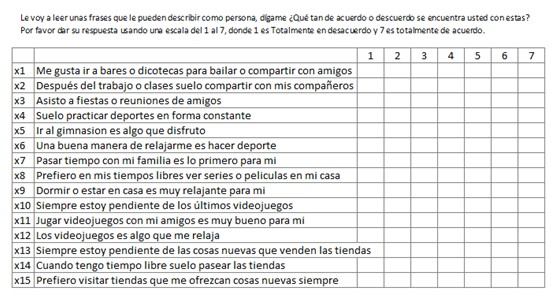

Cargamos la base de datos Casi_Dimensiones.csv

In [ ]:
#Cargamos la base
dataDimensiones<-read.csv("Caso_Dimensiones.csv",header = TRUE)
head(dataDimensiones)

x1 x2 x3 x4 x5 x6 x7 x8 x9 x10 x11 x12 x13 x14 x15
1 7  5  6  3  4  3  1  1  2  3   3   2   4   4   4  
2 3  3  2  6  6  5  1  1  1  1   1   1   1   1   1  
3 4  4  4  5  4  5  2  2  2  2   2   1   4   3   4  
4 2  2  2  2  2  2  3  2  2  3   2   3   3   4   3  
5 2  3  2  1  2  2  5  4  4  1   2   1   6   6   6  
6 7  6  5  1  1  1  2  2  1  2   1   1   2   3   2

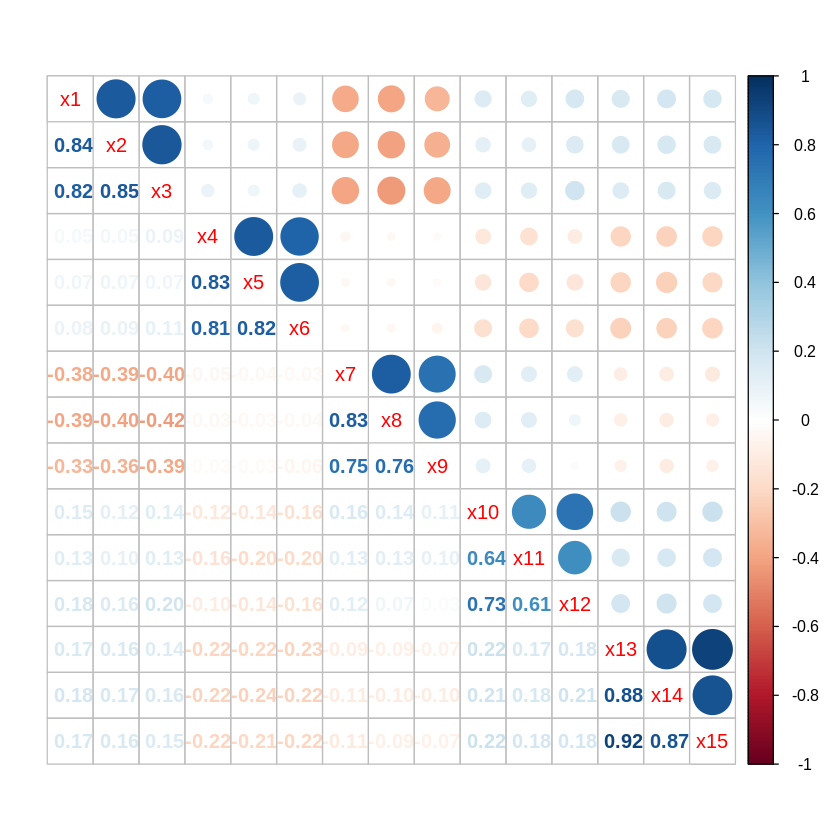

In [ ]:
#visualizacion con un grafico global
library(corrplot)
corrplot.mixed(cor(dataDimensiones, method = "spearman"), lower = "number",upper = "circle")

Se observa que 1,2,3 tiene una correlacion negativa con 7,8,9

**APLICACIÓN 4**:

********************************************************

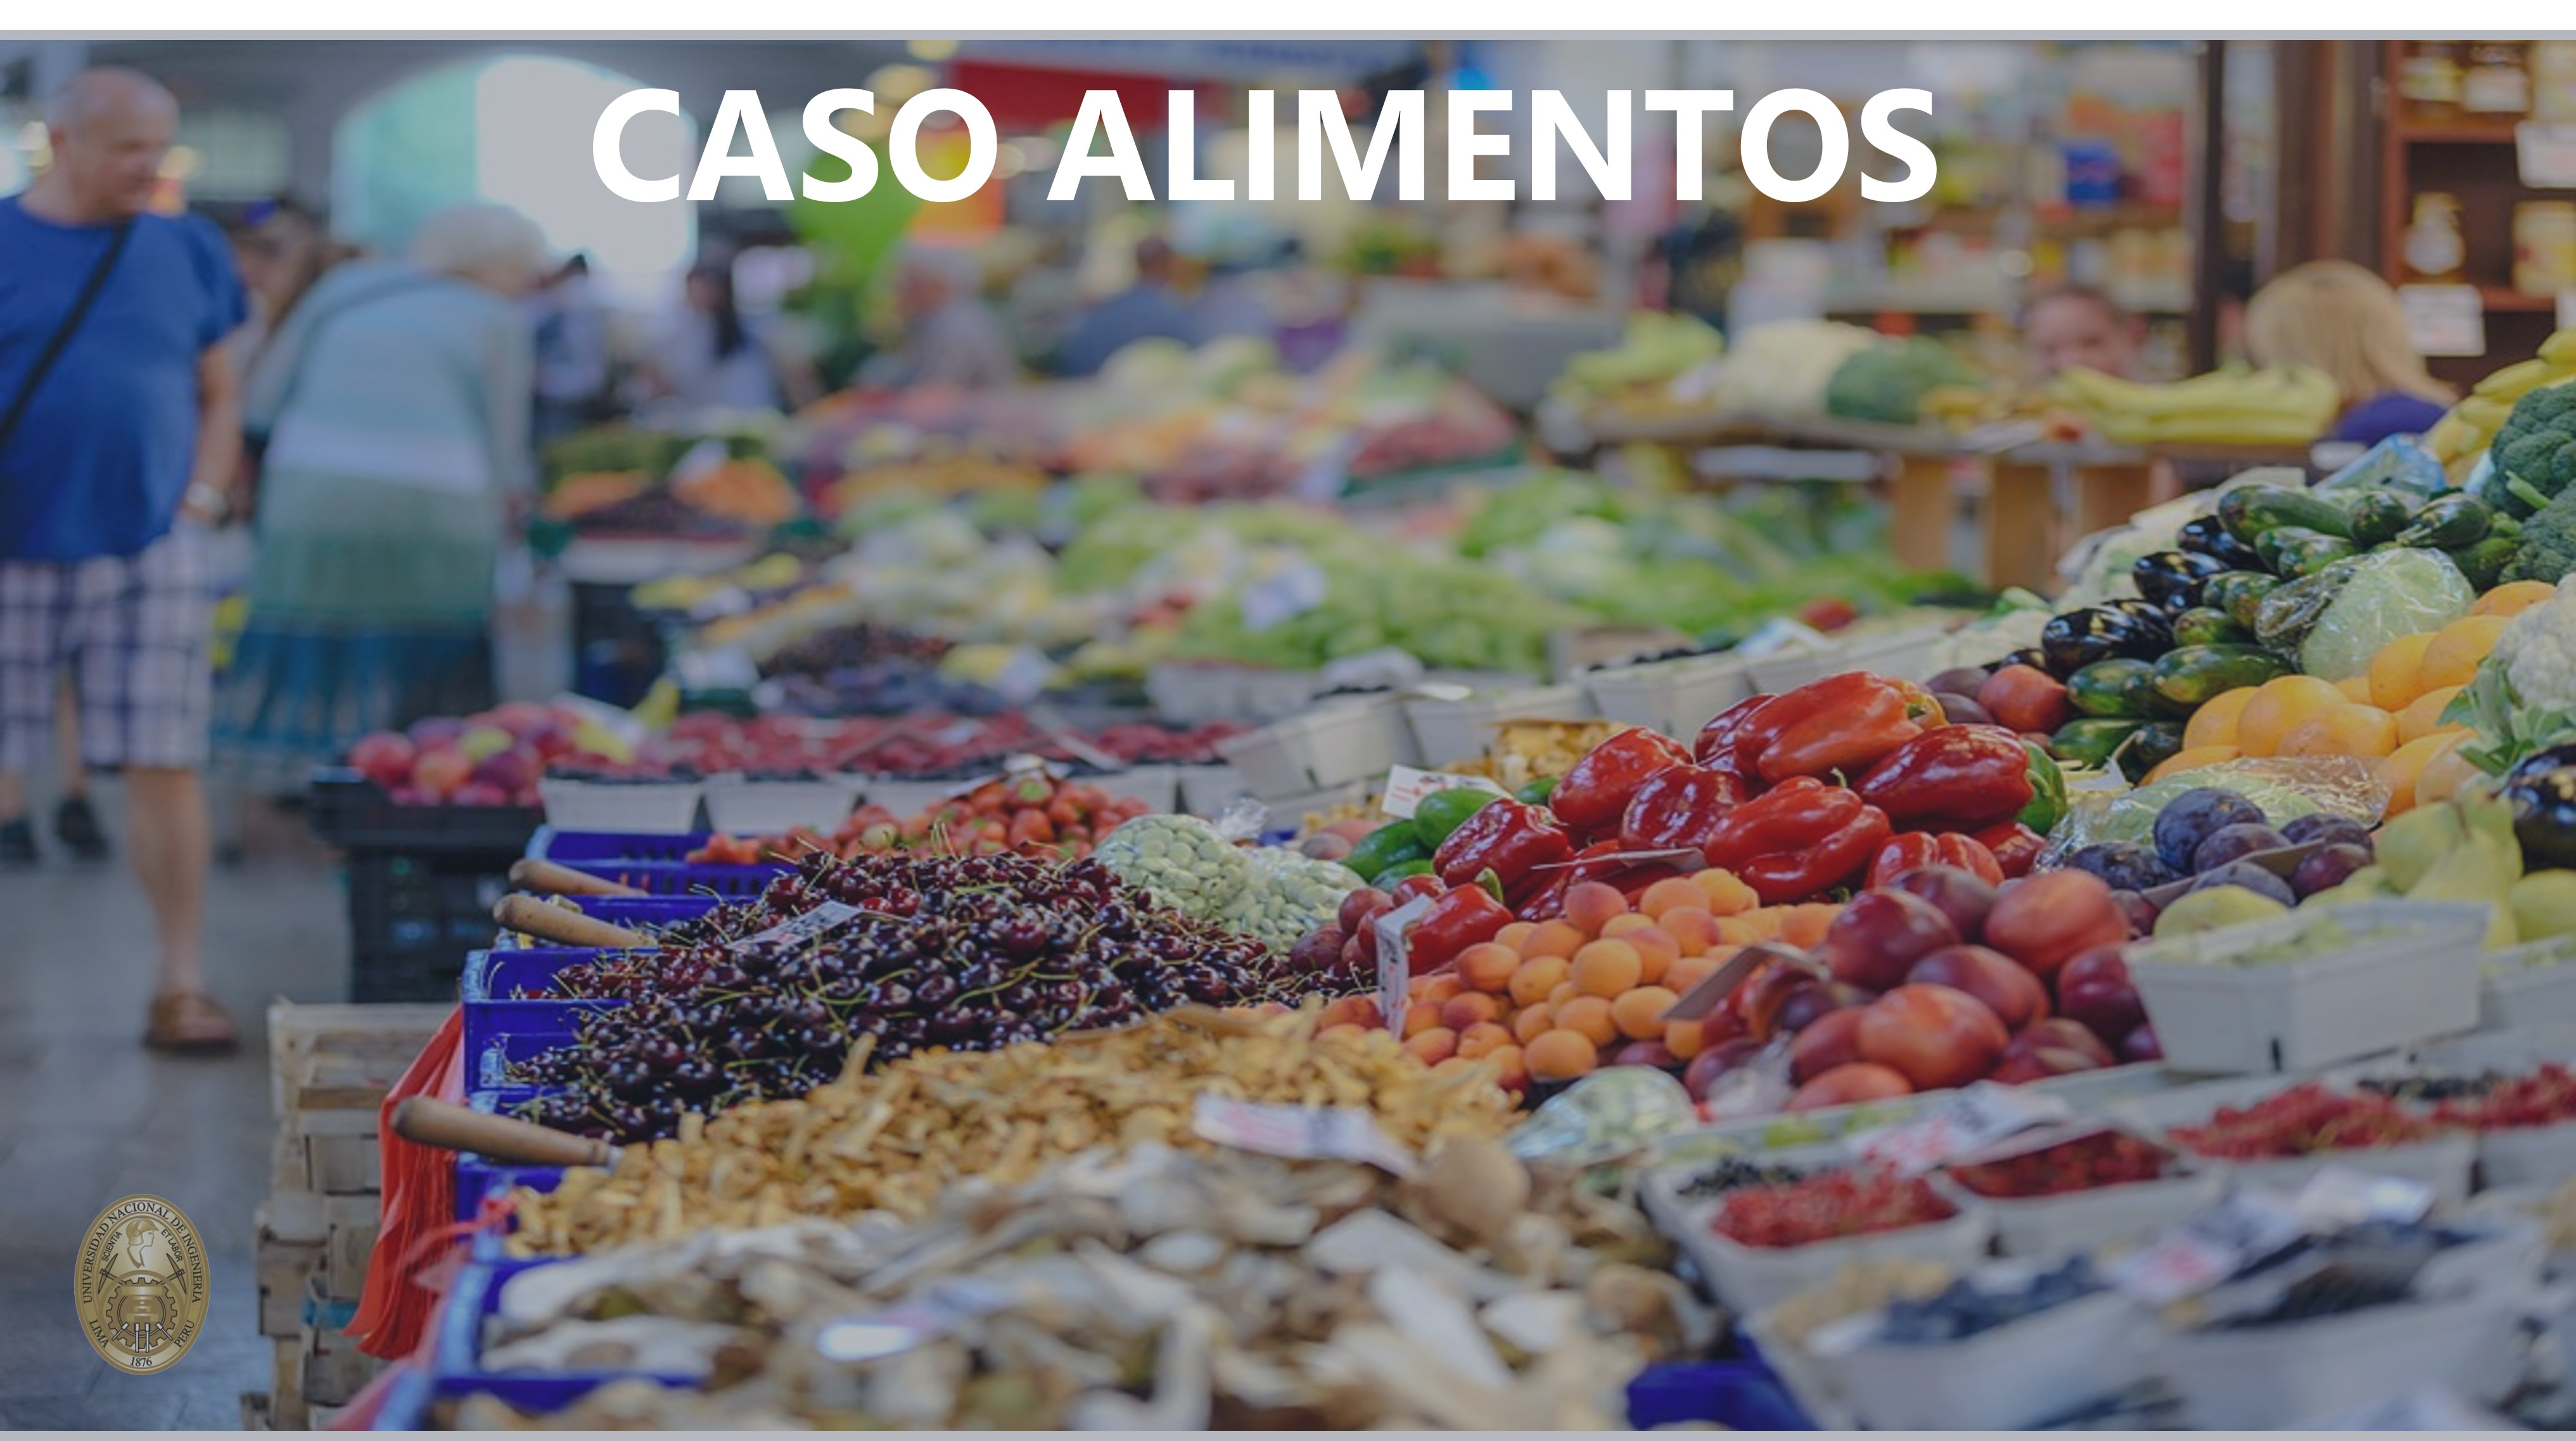

Revisar la data Caso_Alimentos, que cuenta con el consumo de 1000 hogares extraidos de la Encuesta Nacional de Hogares, y tratar de ubicar asociaciones de compra, como por ejemplo:

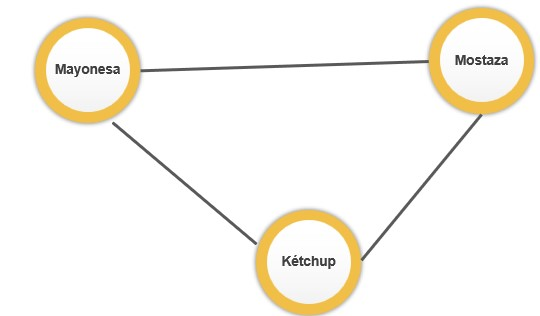

In [ ]:
#Cargamos la base
dataAlimentos<-read.csv("Caso_Alimentos.csv",header = TRUE)
head(dataAlimentos,n=9L)

AbarAceite AbarArroz AbarAzucar AbarAvena AbarCebada AbarCereales
1 0          0         0          0         0          0           
2 1          0         0          0         0          0           
3 1          1         0          1         0          0           
4 1          1         1          0         0          0           
5 1          1         1          0         0          0           
6 1          1         1          0         0          1           
7 0          0         0          1         0          0           
8 0          0         0          0         0          0           
9 1          1         1          1         0          0           
  AbarHarinatrigo AbarMaicena AbarMaiz AbarQuinua ⋯ GallCaramelos GallChifles
1 0               0           0        1          ⋯ 0             0          
2 0               0           0        0          ⋯ 1             0          
3 0               0           1        1          ⋯ 0             0          
4 0               0           0        0          ⋯ 0             0          
5 0               1           1        0          ⋯ 0             0          
6 0               0           0        0          ⋯ 0             0          
7 0               0           1        1          ⋯ 0             0          
8 0               0           0        0          ⋯ 0             0          
9 0               0           1        0          ⋯ 0             0          
  GallChocolates GallGalletas MermAlgarrobina LechLeche LechMantequilla
1 0              0            0               0         0              
2 0              0            0               1         0              
3 0              0            0               1         1              
4 0              0            0               0         0              
5 1              1            0               0         1              
6 0              0            0               1         0              
7 0              0            0               1         0              
8 0              0            0               1         0              
9 0              1            0               1         1              
  LechMargarina LechYogurt LechHuevos
1 0             0          1         
2 0             0          1         
3 0             1          1         
4 0             1          1         
5 0             0          1         
6 1             0          1         
7 0             1          0         
8 0             0          1         
9 0             1          1

In [ ]:
Resultados<-data.frame(Variable=character(0),Asociacion1=character(0),Phi1=numeric(0), Asociacion2=character(0),Phi2=numeric(0))

In [ ]:
#obtener el numero de variables en el dataframe "dataAlimentos"
num_variables<-ncol(dataAlimentos)
num_variables

[1] 109

In [ ]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#iterar a traves de todas las variables en "dataAlimentos"
for(i in 1:num_variables){
  var_actual<-colnames(dataAlimentos)[i]

  #inicializacion de varibles para el seguimiento de las dos asociaciones mas altas
  max_phi1<- 0
  max_phi2<- 0
  asociacion1 <-""
  asociacion2 <-""
  #calcular el coeficiente phi para la varible actual con todas las demás
  for(j in 1:num_variables){
    if(j !=i){
      otra_var<-colnames(dataAlimentos)[j]
      tabla_contingencia<-table(dataAlimentos[[var_actual]],dataAlimentos[[otra_var]])
      phid<-phi(tabla_contingencia)
      #verificar si phid es mayor que max_phi1 o maxphi2
      if(phid>max_phi1){
        max_phi2<-max_phi1
        asociacion2<-asociacion1
        max_phi1<-phid
        asociacion1<-otra_var
      }else if(phid>max_phi2){
        max_phi2<-phid
        asociacion2<-otra_var
      }
    }

  }
#agregamos los resultados al dataframe "Resultados"
Resultados<-rbind(Resultados, data.frame(Variable=var_actual,Asociacion1=asociacion1,Phi1=max_phi1, Asociacion2=asociacion2,Phi2=max_phi2))

}

In [ ]:
Resultados

Variable        Asociacion1     Phi1 Asociacion2     Phi2
1   AbarAceite      AbarFideos      0.54 AbarArroz       0.47
2   AbarArroz       AbarAzucar      0.61 AbarFideos      0.51
3   AbarAzucar      AbarArroz       0.61 AbarFideos      0.47
4   AbarAvena       AbarFideos      0.35 LechLeche       0.35
5   AbarCebada      TubeOlluco      0.10 AbarMaiz        0.09
6   AbarCereales    VerdZapallo     0.17 VerdAlverja     0.15
7   AbarHarinatrigo AbarPallar      0.26 AbarFrejol      0.21
8   AbarMaicena     AbarQuinua      0.14 AbarMaiz        0.13
9   AbarMaiz        TubePapa        0.33 AbarLentejas    0.32
10  AbarQuinua      VerdBrocoli     0.29 AbarLentejas    0.28
11  AbarTrigo       AbarQuinua      0.23 TubeOlluco      0.21
12  AbarFideos      AbarAceite      0.54 AbarArroz       0.51
13  AbarArveja      AbarLentejas    0.46 AbarFrejol      0.31
14  AbarFrejol      AbarLentejas    0.37 AbarArveja      0.31
15  AbarGarbanzo    AbarPallar      0.23 AbarFrejol      0.21
16  AbarHabas       AbarQuinua      0.11 AbarTrigo       0.11
17  AbarLentejas    AbarArveja      0.46 AbarFrejol      0.37
18  AbarPallar      VerdHaba        0.28 AbarFrejol      0.27
19  AbarSazonadores AbarFideos      0.47 VerdCebolla     0.47
20  AbarKetchup     AbarMayonesa    0.24 AbarMostaza     0.23
21  AbarMayonesa    AbarMostaza     0.25 AbarKetchup     0.24
22  AbarMostaza     AbarMayonesa    0.25 AbarKetchup     0.23
23  BebiCerveza     BebiVino        0.12 ComiPolloBrasa  0.12
24  BebiVino        ComiPizzas      0.15 ComiPolloBrasa  0.14
25  BebiAguamineral FiamAceituna    0.16 LechYogurt      0.16
26  BebiGaseosa     LechYogurt      0.19 ComiPolloBrasa  0.18
27  CafAni          CafManzanilla   0.34 CafTe           0.26
28  CafCafe         LechLeche       0.20 LechHuevos      0.20
29  CafCebada       AbarMaiz        0.17 VerdBeterraga   0.16
30  CafChocolate    LechYogurt      0.16 AbarMayonesa    0.15
⋮   ⋮               ⋮               ⋮    ⋮               ⋮   
80  VerdNabo        VerdPoro        0.26 AbarPallar      0.21
81  VerdPepinillo   VerdBrocoli     0.35 VerdAlverja     0.33
82  VerdPerejil     VerdHierbabuena 0.26 VerdEspinaca    0.25
83  VerdPoro        VerdApio        0.41 VerdZapallo     0.27
84  VerdRabanito    VerdCaigua      0.18 VerdChoclo      0.18
85  VerdTomate      VerdCebolla     0.49 VerdZanahoria   0.48
86  VerdZanahoria   VerdTomate      0.48 VerdCebolla     0.46
87  VerdZapallo     VerdApio        0.47 VerdZanahoria   0.46
88  TubeCamote      VerdBrocoli     0.32 VerdChoclo      0.31
89  TubeOlluco      VerdAlverja     0.29 AbarQuinua      0.28
90  TubePapa        VerdCebolla     0.40 VerdTomate      0.36
91  TubeYuca        TubeCamote      0.30 VerdCulantro    0.27
92  FiamAceituna    VerdChoclo      0.28 FiamQueso       0.26
93  FiamChorizo     CarnChancho     0.16 FiamHotDog      0.11
94  FiamJamon       LechMantequilla 0.19 ComiPizzas      0.15
95  FiamJamonada    FiamHotDog      0.29 LechMargarina   0.23
96  FiamMortadela   FiamHotDog      0.15 ComiTamales     0.11
97  FiamQueso       LechLeche       0.31 VerdAlverja     0.30
98  FiamHotDog      FiamSalchicha   0.43 FiamJamonada    0.29
99  FiamSalchicha   FiamHotDog      0.43 CafChocolate    0.11
100 GallCaramelos   GallChocolates  0.15 BebiGaseosa     0.13
101 GallChifles     PescCachema     0.15 VerdCulantro    0.12
102 GallChocolates  GallCaramelos   0.15 BebiGaseosa     0.11
103 GallGalletas    LechLeche       0.21 LechYogurt      0.20
104 MermAlgarrobina PescToyo        0.15 PescCachema     0.12
105 LechLeche       LechHuevos      0.37 AbarAvena       0.35
106 LechMantequilla CarnRes         0.22 ComiPolloBrasa  0.19
107 LechMargarina   FiamJamonada    0.23 AbarHarinatrigo 0.21
108 LechYogurt      LechLeche       0.28 FiamQueso       0.24
109 LechHuevos      LechLeche       0.37 TubePapa        0.36